## 📊 Business Understanding

### Goal and Purpose

The goal of this project is to predict employee resignation (churn) within the organization. By understanding which employees are likely to resign, the company can take proactive measures to improve retention, reduce turnover costs, and maintain a stable workforce.

### Business Objectives

1. *Identify Potential Resignations*: Predict employees who are likely to resign.
2. *Improve Employee Retention*: Develop strategies to retain top talent and reduce turnover.
3. *Optimize HR Resources*: Allow HR to focus on at-risk employees and provide targeted interventions.

### Key Stakeholders

1. *Human Resources (HR)*:  
   - Use predictions to design retention strategies and manage employee satisfaction.
   
2. *Management and Leadership*:  
   - Understand resignation patterns to improve company policies and employee well-being.
   
3. *Finance Department*:  
   - Estimate and reduce costs associated with employee turnover and rehiring.

4. *IT and Data Teams*:  
   - Maintain and deploy the predictive model, ensuring data integrity and continuous improvement.

### Expected Impact

- *Reduced Turnover Rates*: By identifying at-risk employees, the company can intervene early.
- *Cost Savings*: Lower costs related to hiring and training new employees.
- *Increased Productivity*: Maintaining a stable workforce leads to consistent performance.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_excel(r"C:\Users\bolla\Downloads\Extended_Employee_Performance_and_Productivity_Data.xlsx")

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Data Understanding
print("\nDataset Information:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


First few rows of the dataset:
   Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                Hire_Date  Years_At_Company Education_Level  \
0 2022-01-19 08:03:05.556                 2     High School   
1 2024-04-18 08:03:05.556                 0     High School   
2 2015-10-26 08:03:05.556                 8     High School   
3 2016-10-22 08:03:05.556                 7        Bachelor   
4 2021-07-23 08:03:05.556                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5            6750                   33                32   
1                  5            7500                   34        

In [2]:
# Preprocessing datetime columns
datetime_columns = data.select_dtypes(include=['datetime64']).columns
for col in datetime_columns:
    data[f'{col}_year'] = data[col].dt.year
    data[f'{col}_month'] = data[col].dt.month
    data[f'{col}_day'] = data[col].dt.day

data.drop(columns=datetime_columns, inplace=True)
print("\nData after handling datetime columns:")
print(data.info())


Data after handling datetime columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Years_At_Company             100000 non-null  int64  
 6   Education_Level              100000 non-null  object 
 7   Performance_Score            100000 non-null  int64  
 8   Monthly_Salary               100000 non-null  int64  
 9   Work_Hours_Per_Week          100000 non-null  int64  
 10  Projects_Handled             100000 non-null  int64  
 11  Overtime_Hours               100000 non-null  int64  
 12  Sick_Days           

In [3]:
# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numerical variables
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Handle missing values if any
data.fillna(data.mean(), inplace=True)

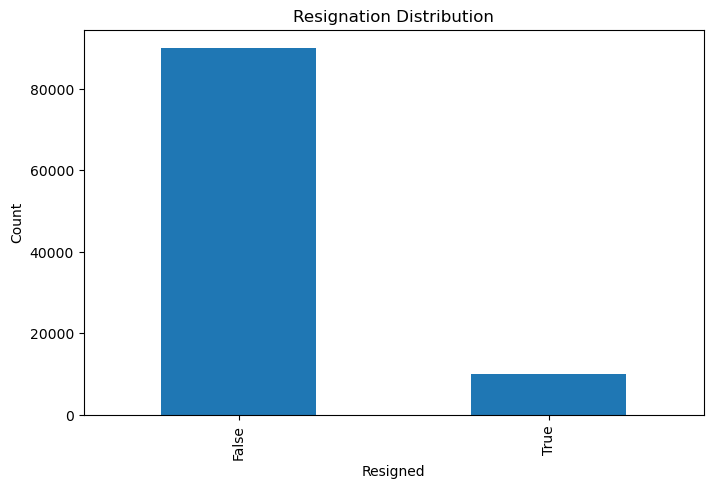

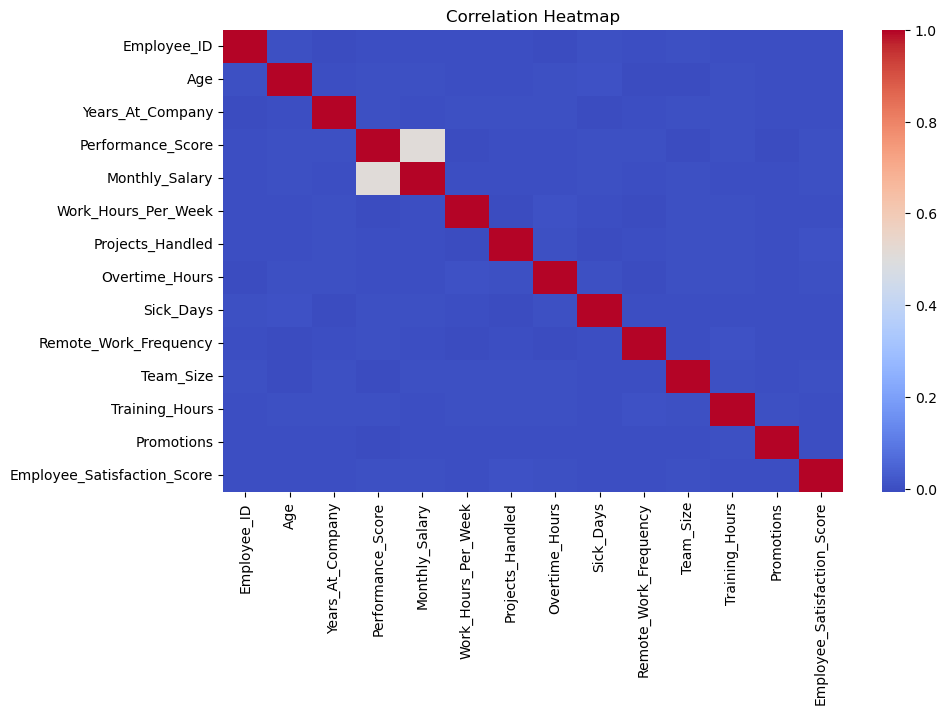

<Figure size 1500x1000 with 0 Axes>

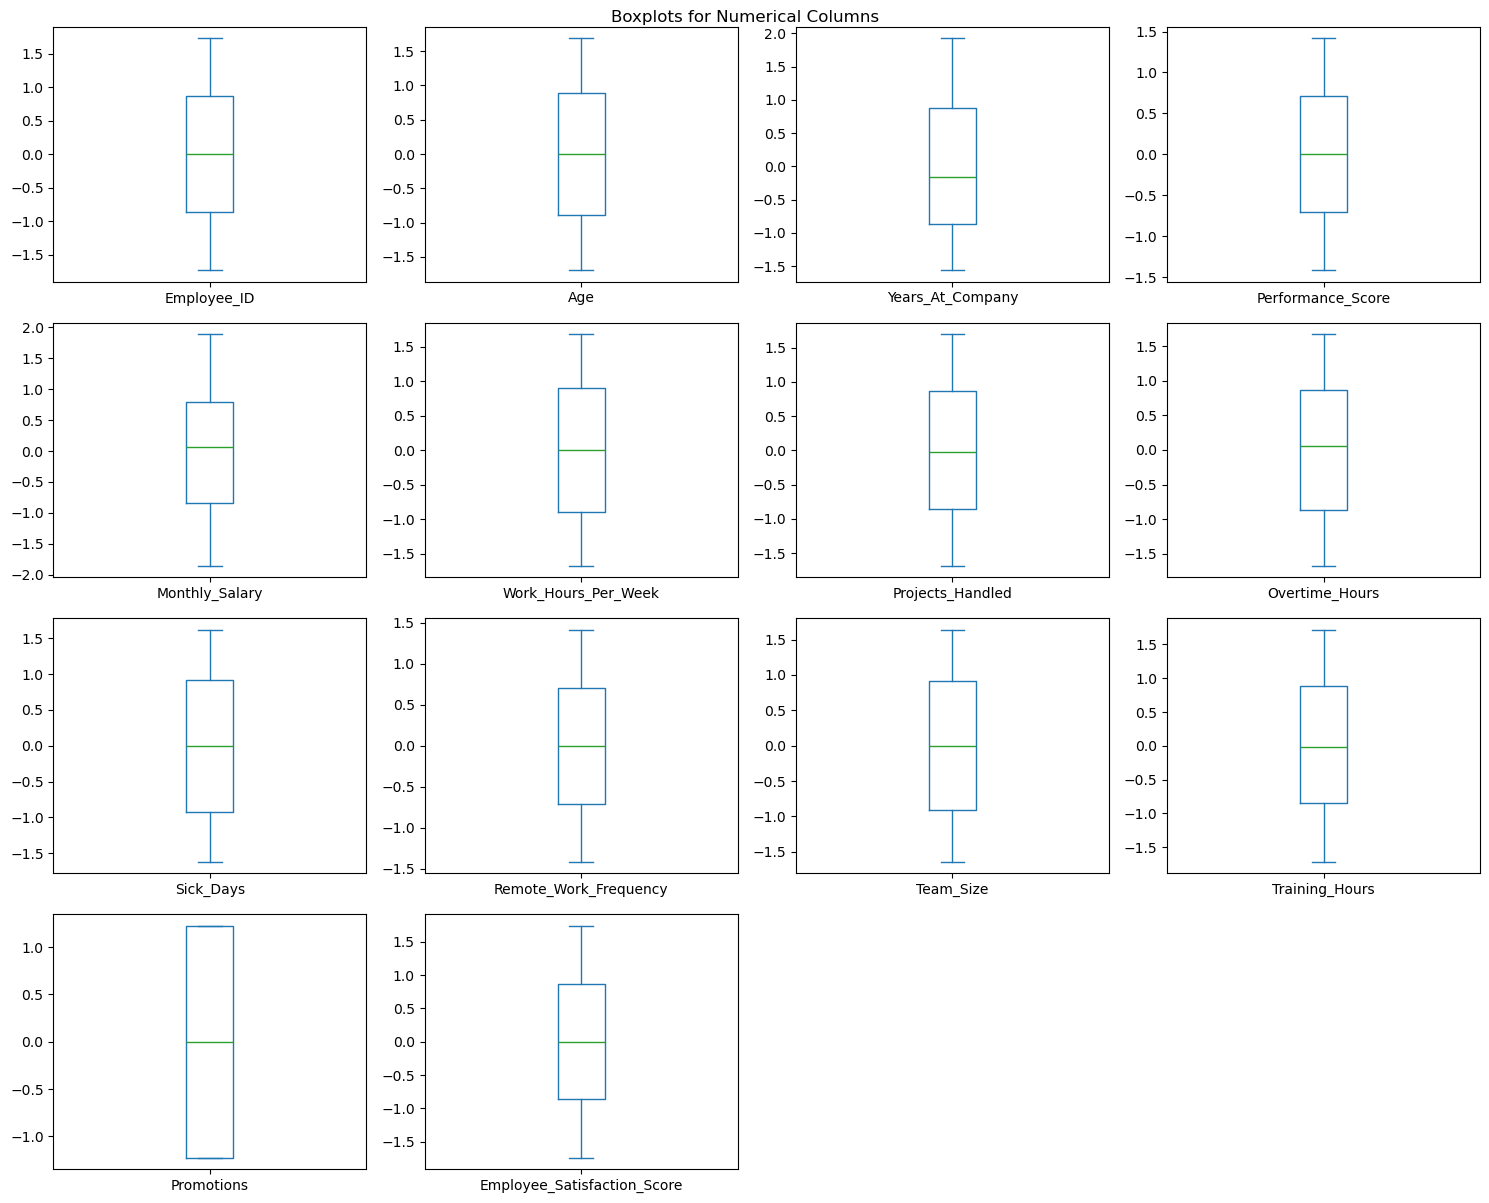

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count Plot for 'Resigned'
plt.figure(figsize=(8, 5))
data['Resigned'].value_counts().plot.bar()
plt.title('Resignation Distribution')
plt.xlabel('Resigned')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap for Numerical Columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplots for Outliers (Combined)
plt.figure(figsize=(15, 10))
data[numerical_columns].plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 15))
plt.suptitle('Boxplots for Numerical Columns')
plt.tight_layout()
plt.show()

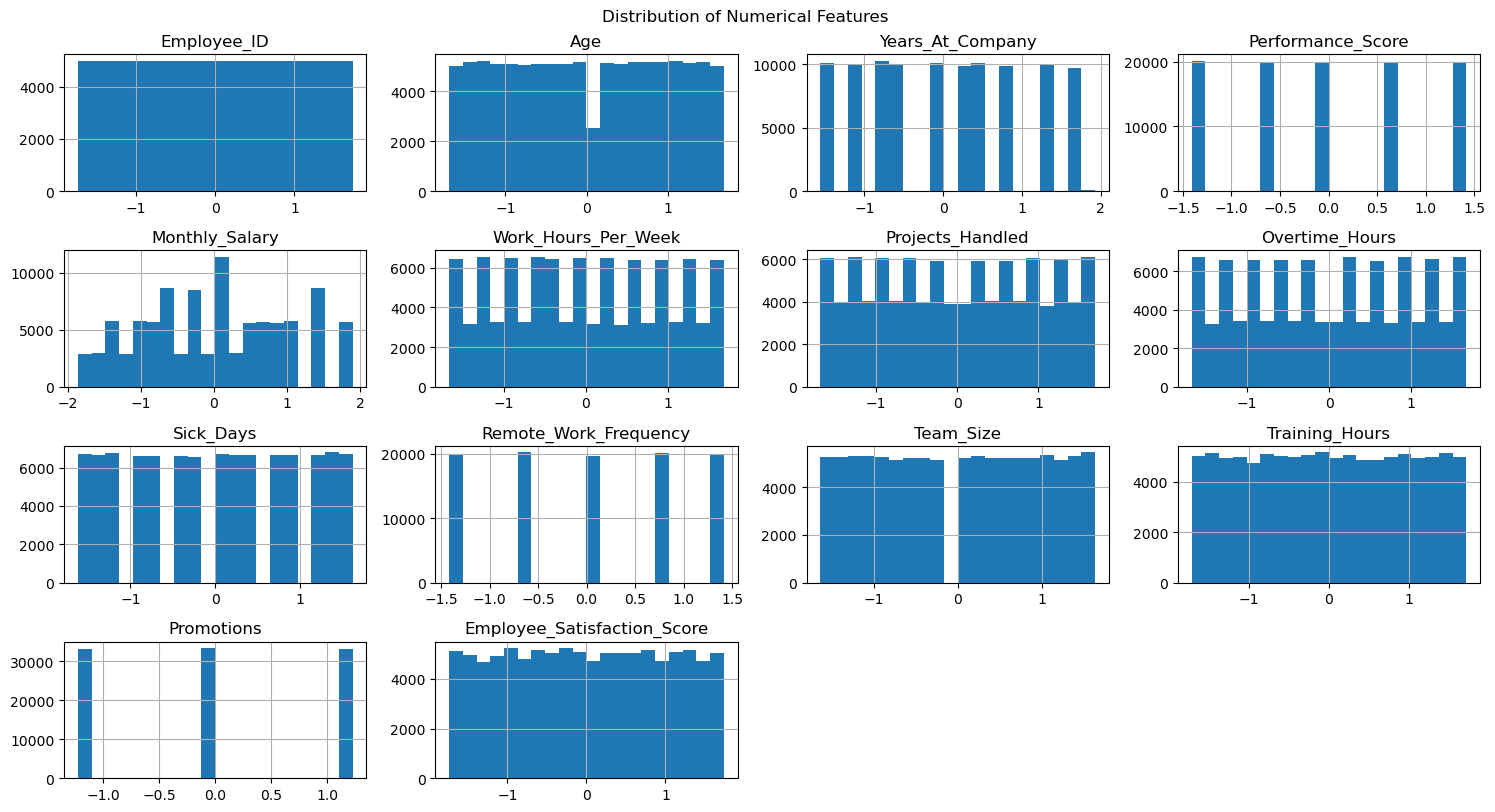

In [9]:
# Histograms for Numerical Columns
data[numerical_columns].hist(bins=20, figsize=(15, 10), layout=(5, 4))
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

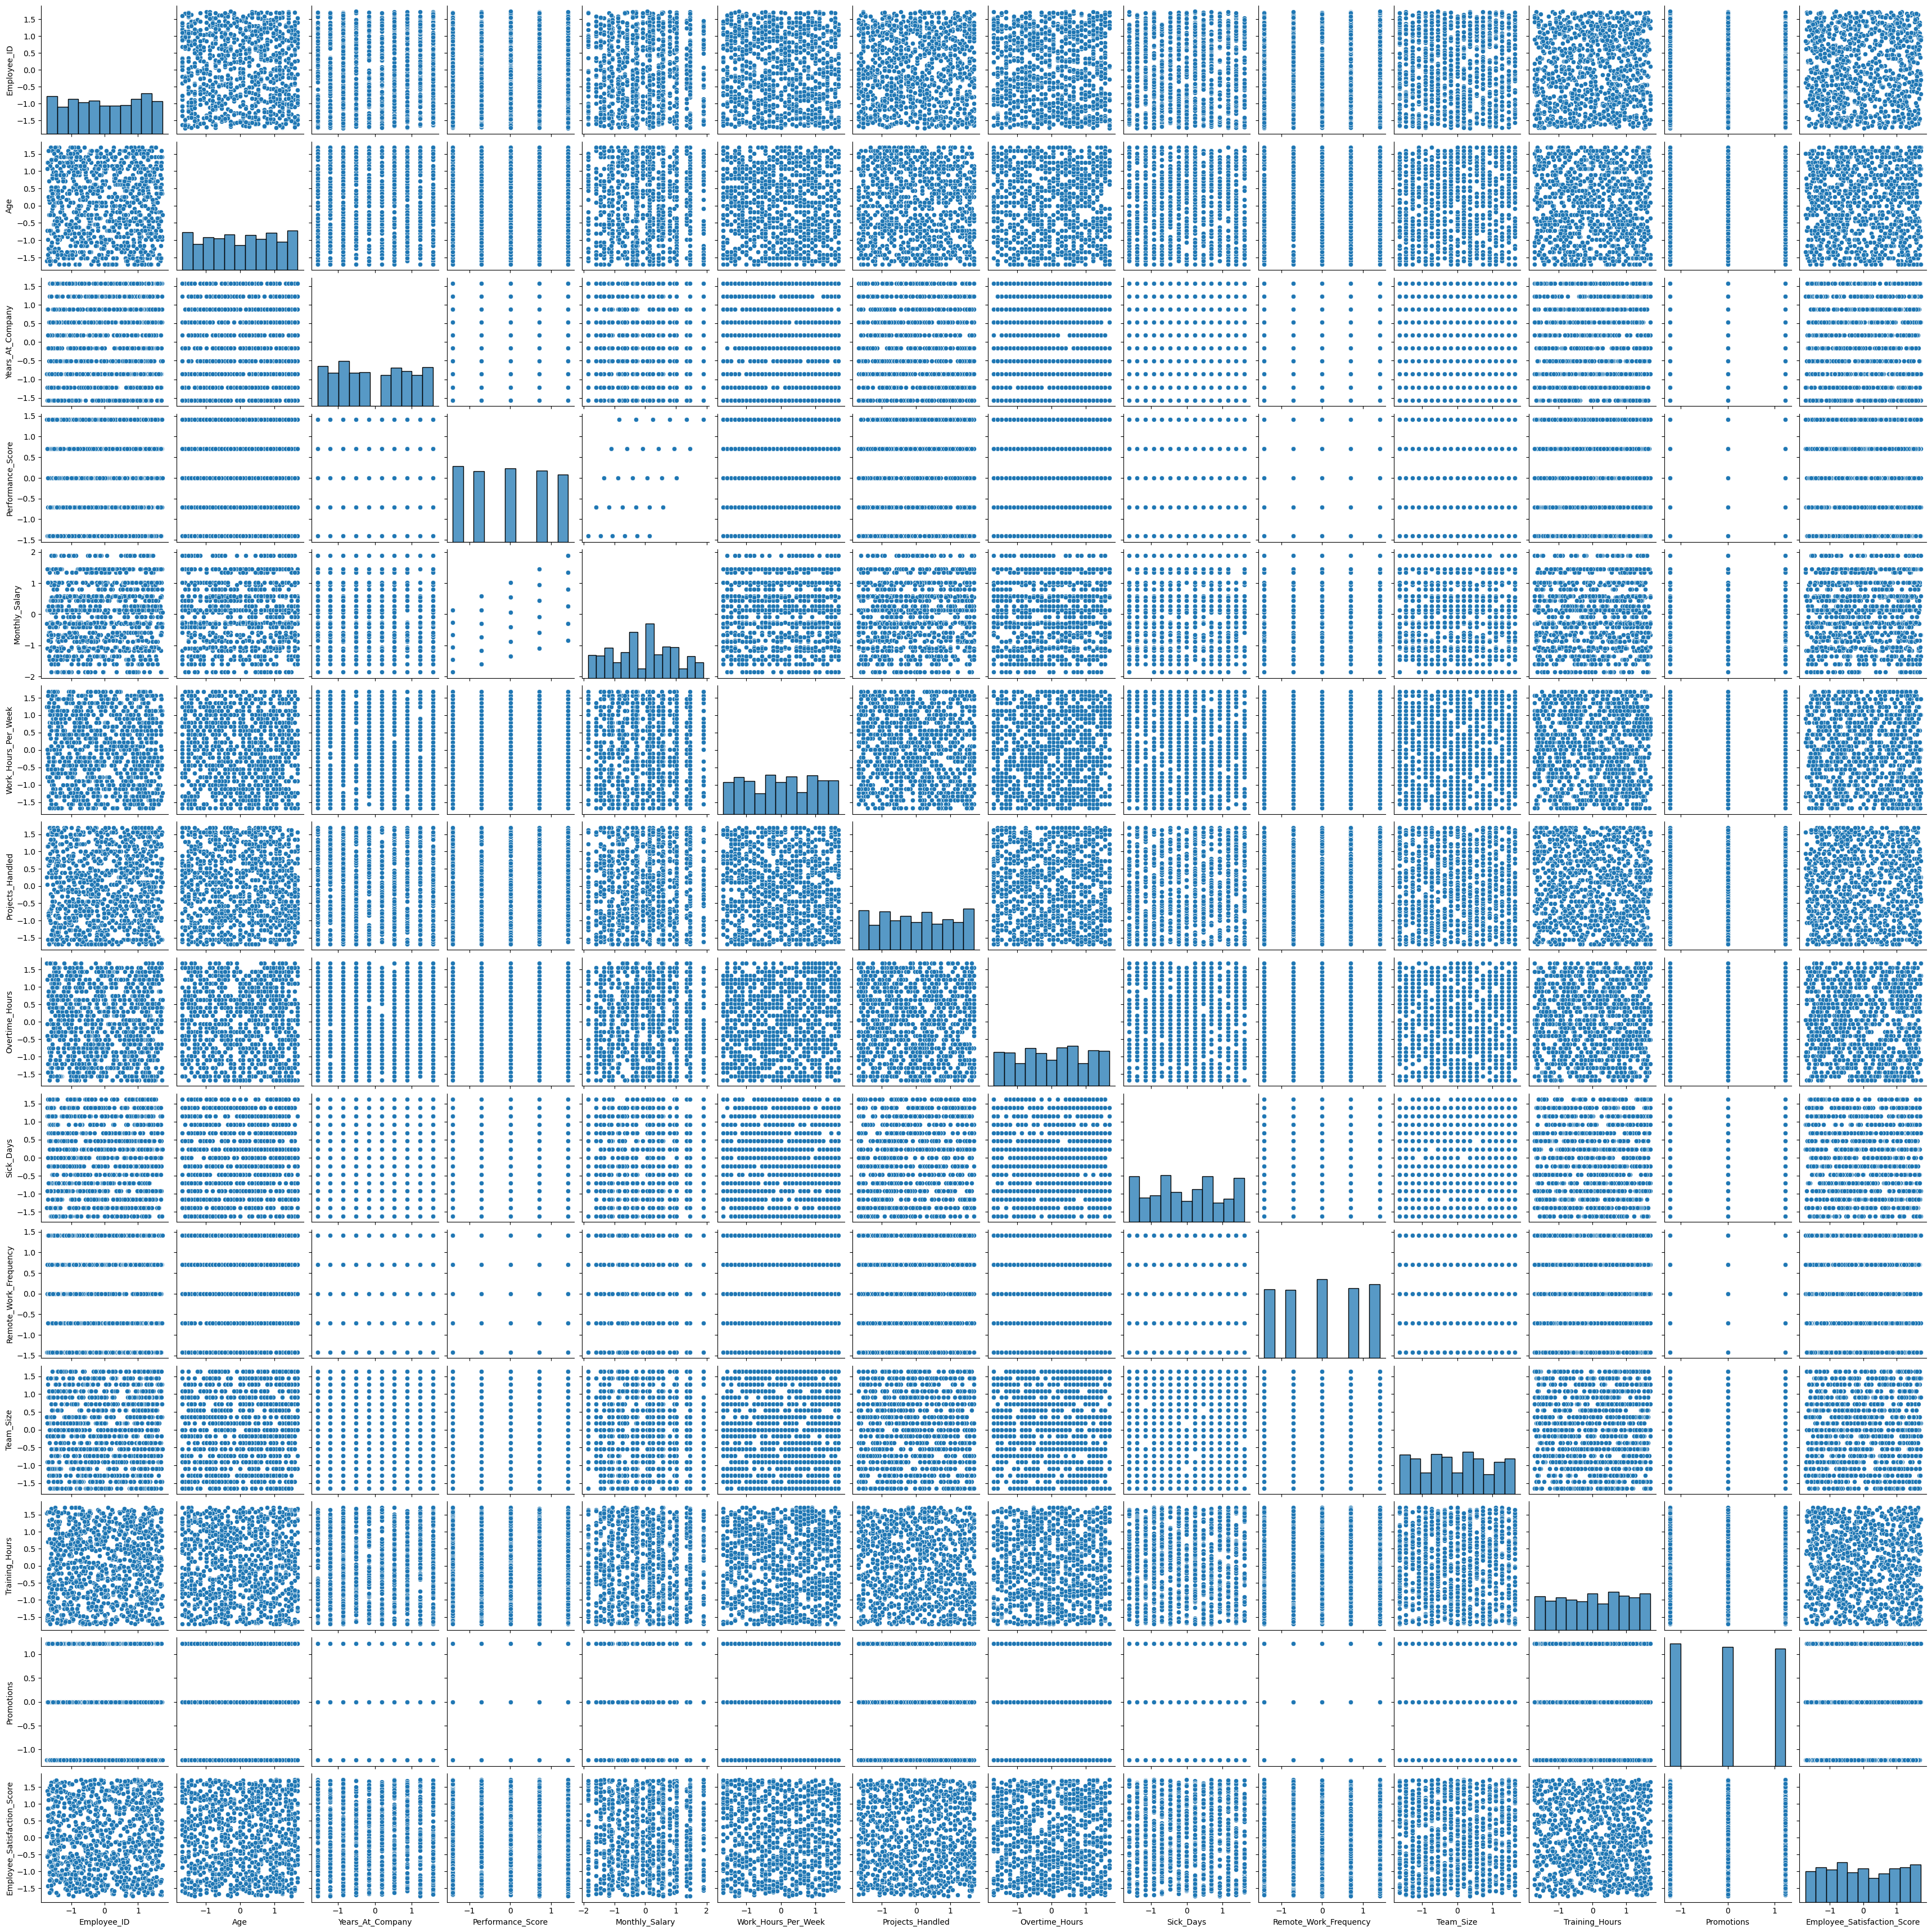

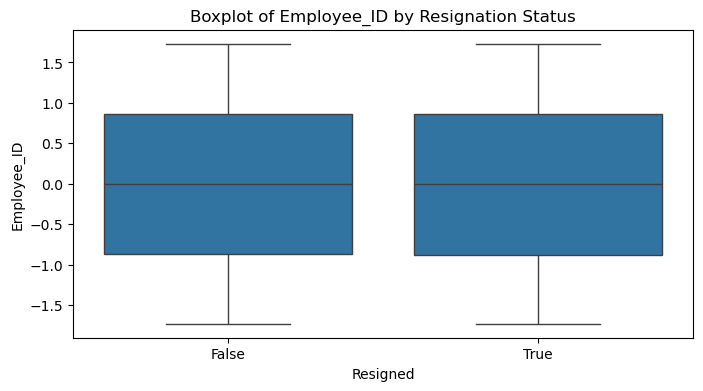

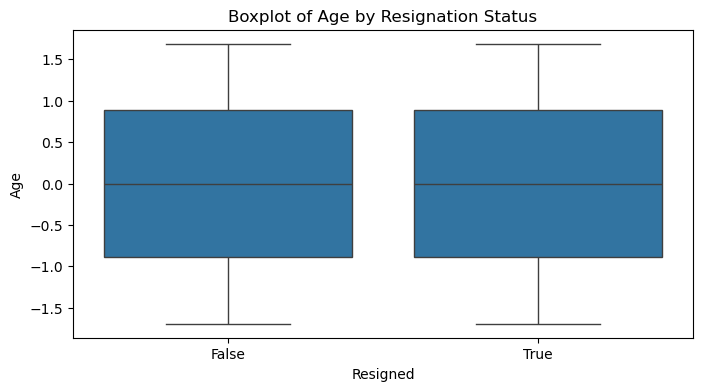

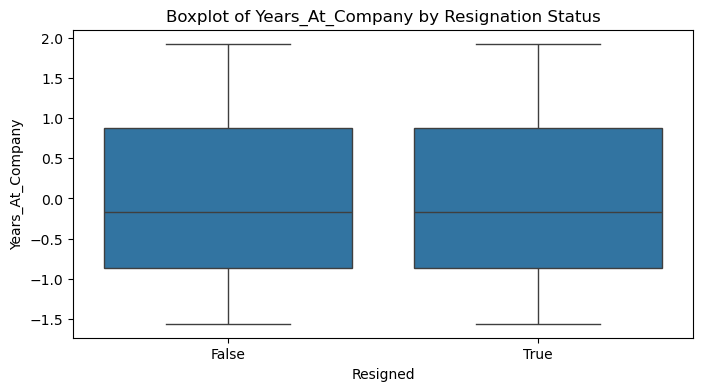

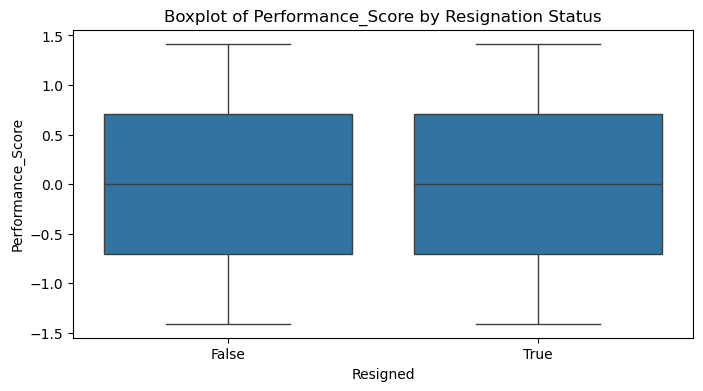

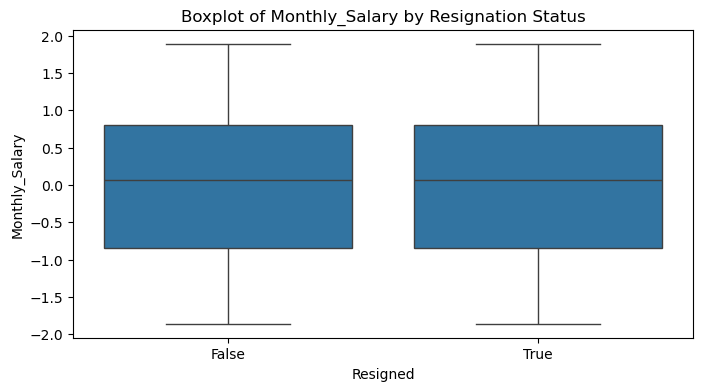

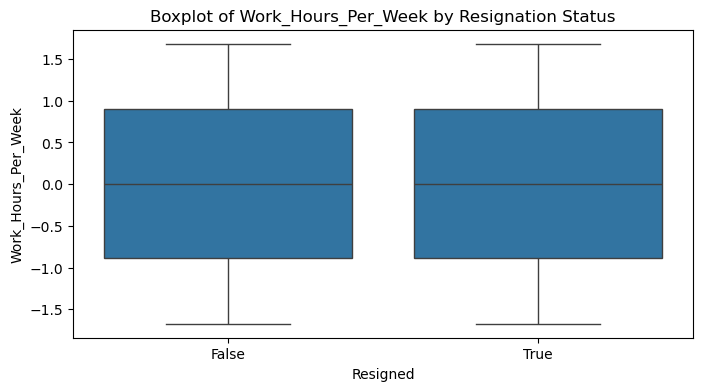

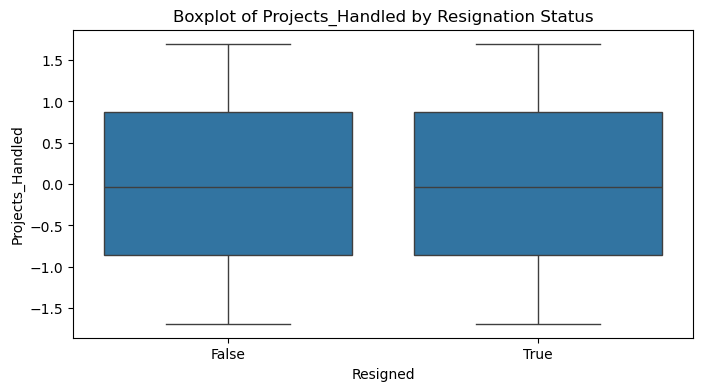

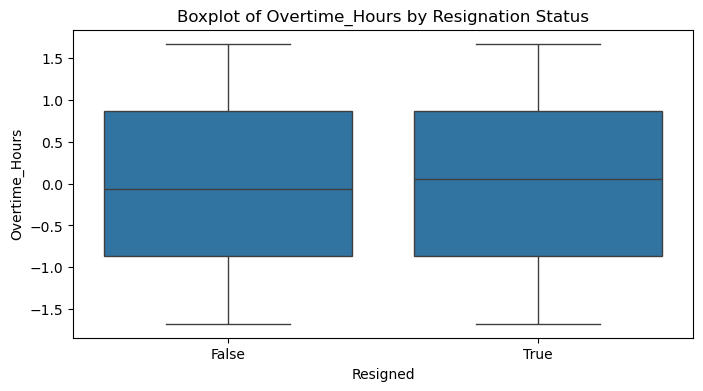

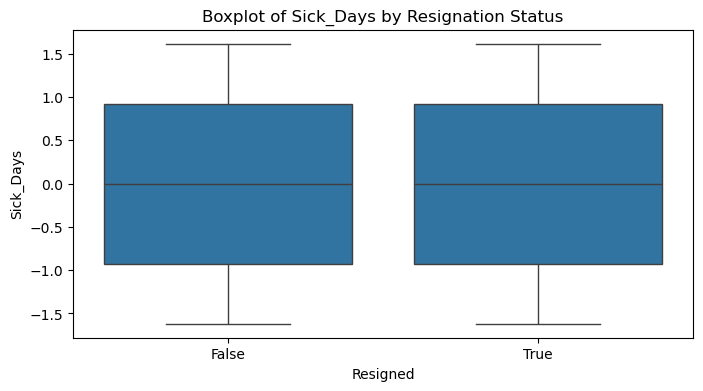

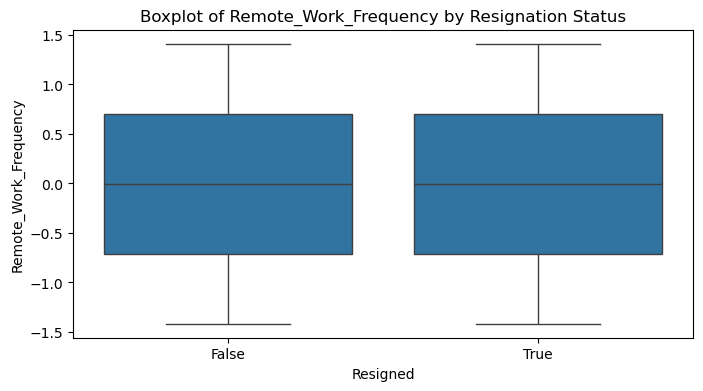

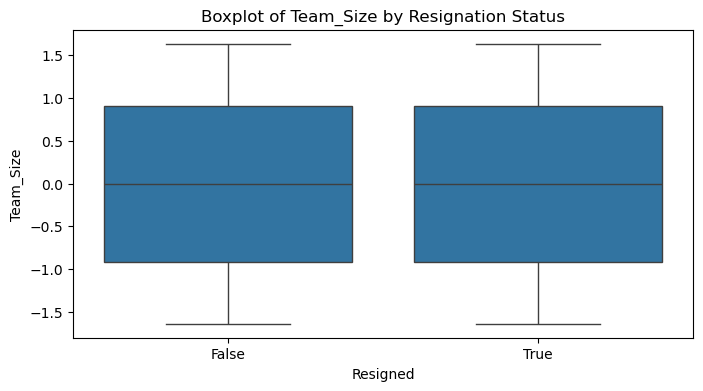

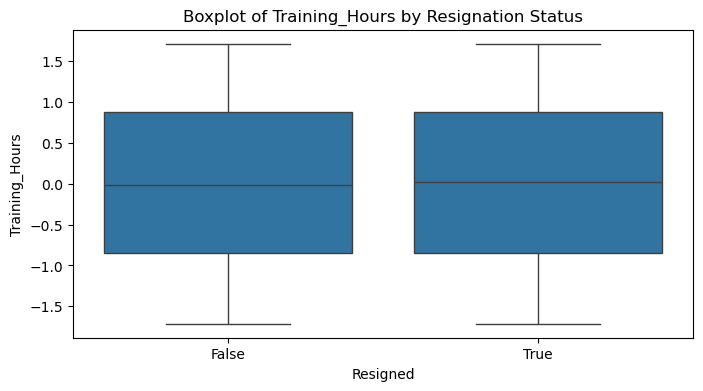

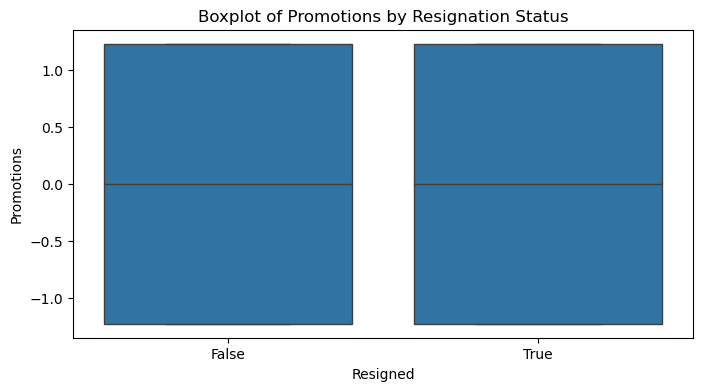

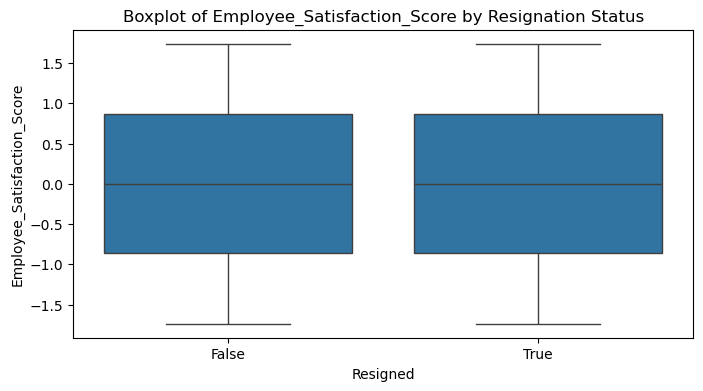

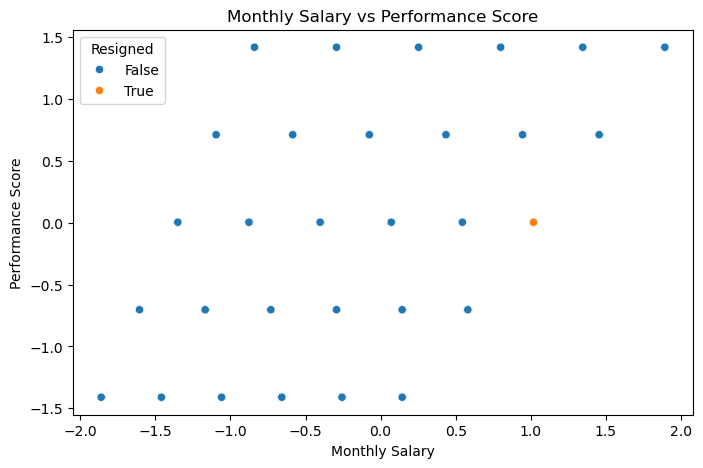

In [13]:
# Pair Plot for Numerical Columns (Sample of 1000 rows for performance)
sns.pairplot(data[numerical_columns].sample(1000))
plt.show()
# Boxplots for Numerical Columns Grouped by 'Resigned'
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Resigned', y=col, data=data)
    plt.title(f'Boxplot of {col} by Resignation Status')
    plt.show()
# Scatter Plot for Monthly Salary vs. Performance Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Monthly_Salary', y='Performance_Score', hue='Resigned', data=data)
plt.title('Monthly Salary vs Performance Score')
plt.xlabel('Monthly Salary')
plt.ylabel('Performance Score')
plt.show()

In [15]:
# Train-test split
X = data.drop(columns=['Resigned'])
y = data['Resigned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

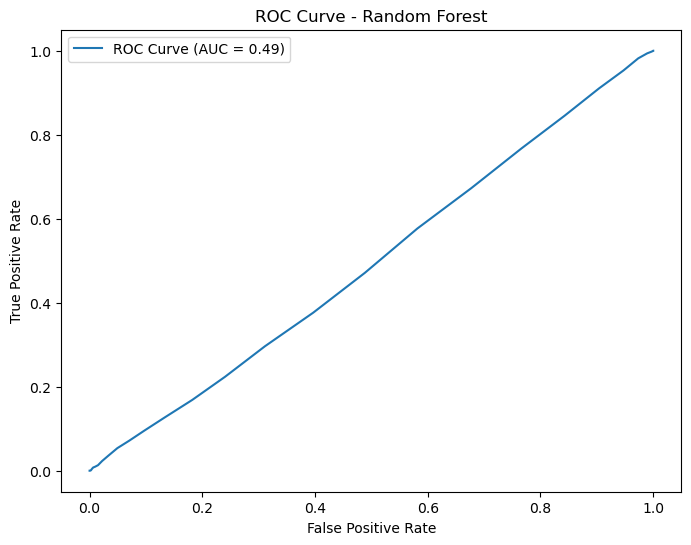

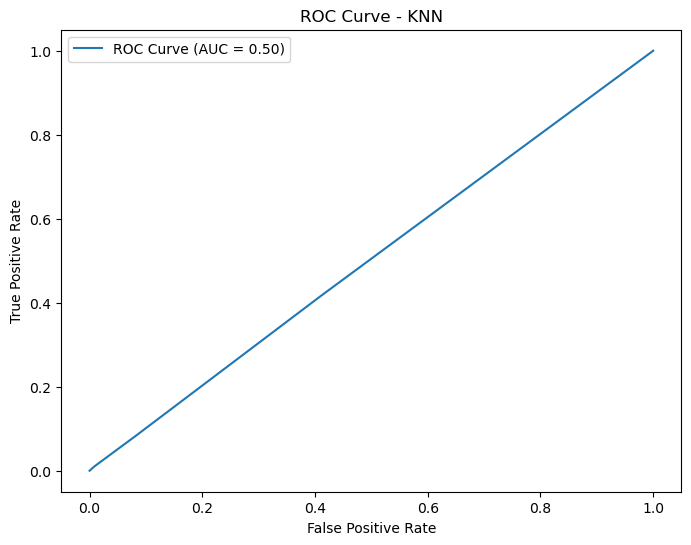

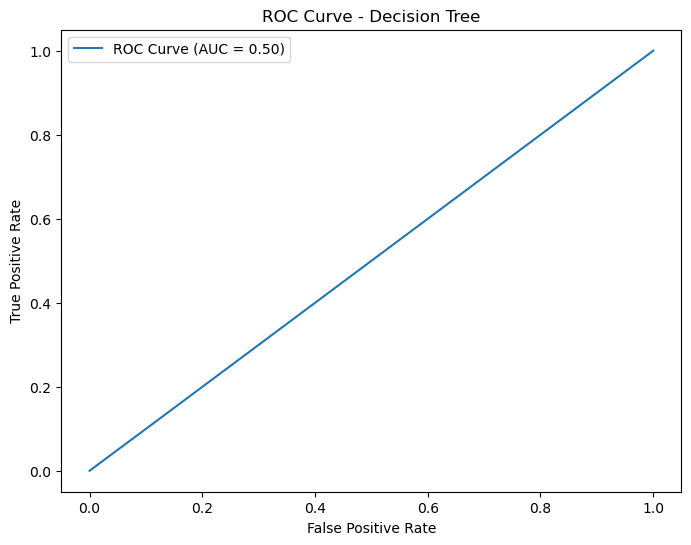

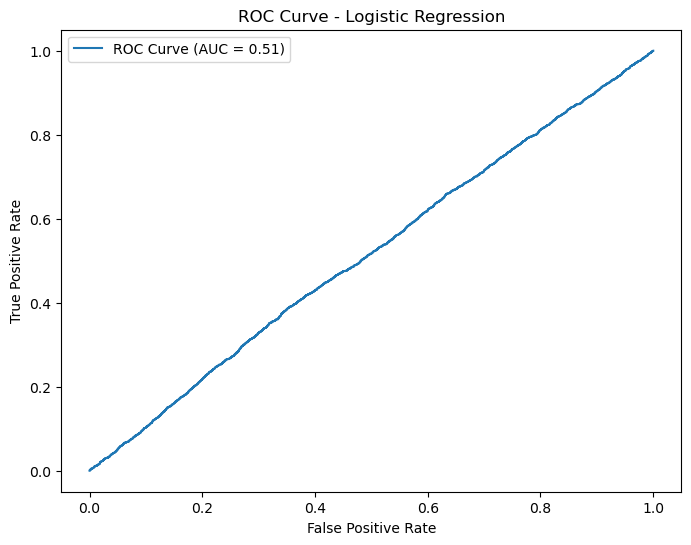

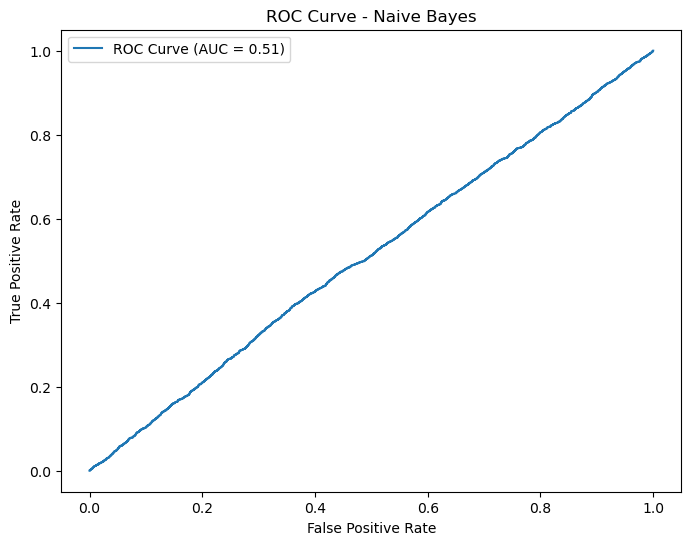

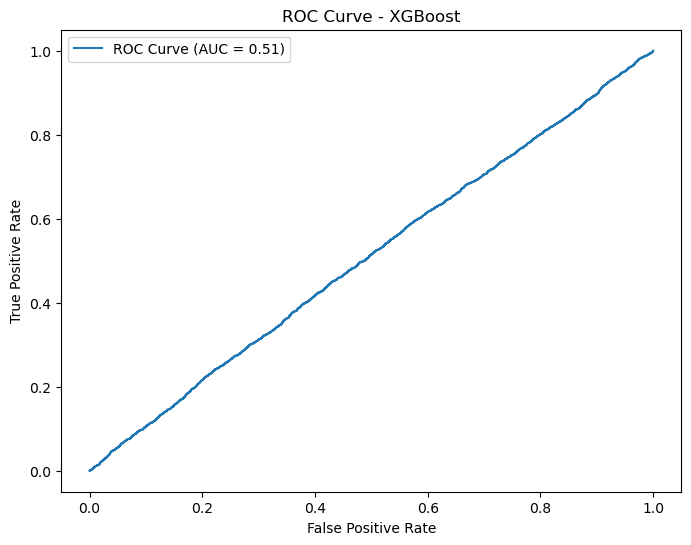

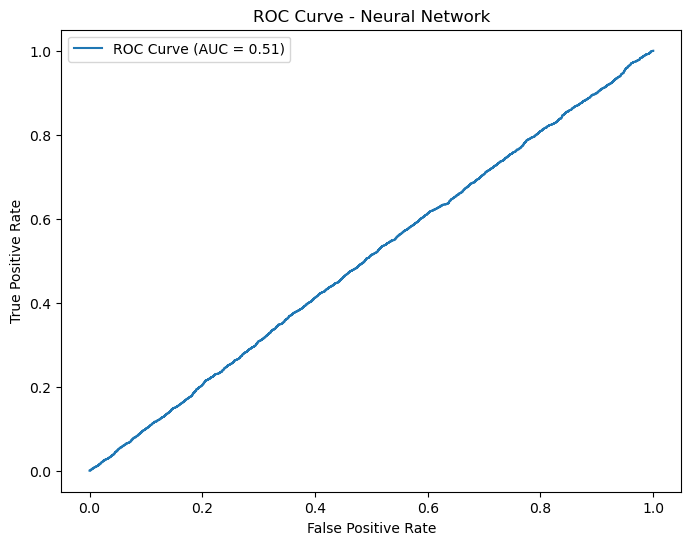

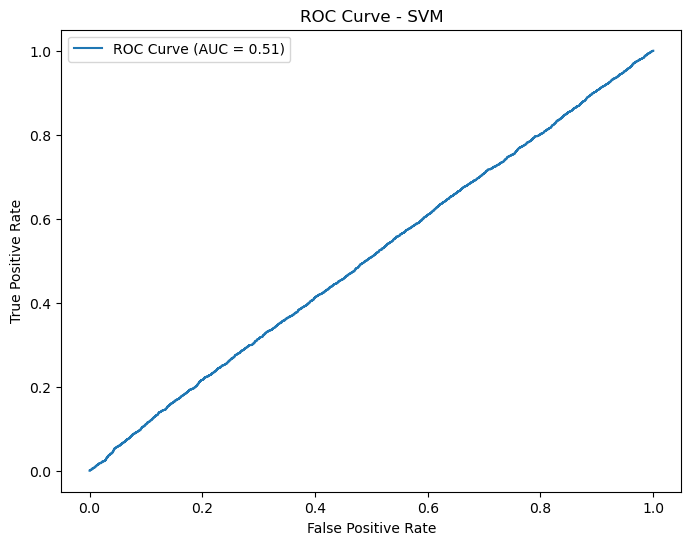

Model: Random Forest
F1 Score: 0.00
AUC Score: 0.49
Classification Report:
               precision    recall  f1-score   support

       False       0.90      1.00      0.95     26969
        True       0.00      0.00      0.00      3031

    accuracy                           0.90     30000
   macro avg       0.45      0.50      0.47     30000
weighted avg       0.81      0.90      0.85     30000

Confusion Matrix:
 [[26969     0]
 [ 3031     0]]
--------------------------------------------------
Model: KNN
F1 Score: 0.02
AUC Score: 0.50
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.99      0.94     26969
        True       0.12      0.01      0.02      3031

    accuracy                           0.89     30000
   macro avg       0.51      0.50      0.48     30000
weighted avg       0.82      0.89      0.85     30000

Confusion Matrix:
 [[26740   229]
 [ 3000    31]]
--------------------------------------------------
Mo

In [16]:
# Model Building and Evaluation
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier(),
    "SVM": SVC(probability=True)
}

results = []

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation Metrics
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
        plt.title(f"ROC Curve - {model_name}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()
    else:
        auc_score = None

    # Store results
    results.append({
        "Model": model_name,
        "F1 Score": f1,
        "AUC Score": auc_score,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    })

# Compare Models
for result in results:
    print(f"Model: {result['Model']}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    if result["AUC Score"]:
        print(f"AUC Score: {result['AUC Score']:.2f}")
    print("Classification Report:\n", result["Classification Report"])
    print("Confusion Matrix:\n", result["Confusion Matrix"])
    print("-" * 50)



In [17]:
# Create a DataFrame to store the results of all models
results_table = pd.DataFrame([
    {
        "Model": result['Model'],
        "F1 Score": result['F1 Score'],
        "AUC Score": result['AUC Score'],
        "Precision (False)": float(result["Classification Report"].split("\n")[2].split()[1]),
        "Precision (True)": float(result["Classification Report"].split("\n")[3].split()[1]),
        "Recall (False)": float(result["Classification Report"].split("\n")[2].split()[2]),
        "Recall (True)": float(result["Classification Report"].split("\n")[3].split()[2]),
    }
    for result in results
])

# Convert Precision and Recall columns to numeric values
results_table["F1 Score"] = pd.to_numeric(results_table["F1 Score"], errors="coerce")
results_table["AUC Score"] = pd.to_numeric(results_table["AUC Score"], errors="coerce")

# Display the results table
print("Model Comparison Table:")
print(results_table)

# Sorting models by F1 Score and AUC Score
sorted_table = results_table.sort_values(by=["F1 Score", "AUC Score"], ascending=False)

# Display the sorted table
print("\nSorted Model Comparison Table:")
print(sorted_table)


Model Comparison Table:
                 Model  F1 Score  AUC Score  Precision (False)  \
0        Random Forest  0.000000   0.493622                0.9   
1                  KNN  0.018839   0.502982                0.9   
2        Decision Tree  0.109453   0.499831                0.9   
3  Logistic Regression  0.000000   0.514825                0.9   
4          Naive Bayes  0.000000   0.510961                0.9   
5              XGBoost  0.001310   0.508349                0.9   
6       Neural Network  0.000000   0.505469                0.9   
7                  SVM  0.000000   0.508260                0.9   

   Precision (True)  Recall (False)  Recall (True)  
0              0.00            1.00           0.00  
1              0.12            0.99           0.01  
2              0.10            0.88           0.12  
3              0.00            1.00           0.00  
4              0.00            1.00           0.00  
5              0.09            1.00           0.00  
6         

In [18]:
# Ensure F1 Score and AUC Score are numeric
results_table["F1 Score"] = pd.to_numeric(results_table["F1 Score"], errors="coerce")
results_table["AUC Score"] = pd.to_numeric(results_table["AUC Score"], errors="coerce")

# Identify the best model based on F1 Score and AUC Score
best_model = results_table.sort_values(by=["F1 Score", "AUC Score"], ascending=False).iloc[0]

# Display the best model details
print("Best Model Based on Evaluation Metrics:")
print(f"Model Name: {best_model['Model']}")
print(f"F1 Score: {best_model['F1 Score']:.4f}")
print(f"AUC Score: {best_model['AUC Score']:.4f}")
print(f"Precision (False): {best_model['Precision (False)']:.4f}")
print(f"Precision (True): {best_model['Precision (True)']:.4f}")
print(f"Recall (False): {best_model['Recall (False)']:.4f}")
print(f"Recall (True): {best_model['Recall (True)']:.4f}")


Best Model Based on Evaluation Metrics:
Model Name: Decision Tree
F1 Score: 0.1095
AUC Score: 0.4998
Precision (False): 0.9000
Precision (True): 0.1000
Recall (False): 0.8800
Recall (True): 0.1200


Feature Importance of Decision Tree:
                        Feature  Importance
0                   Employee_ID    0.107327
17  Employee_Satisfaction_Score    0.090292
15               Training_Hours    0.071451
10             Projects_Handled    0.064297
20                Hire_Date_day    0.061129
9           Work_Hours_Per_Week    0.060639
11               Overtime_Hours    0.059700
3                           Age    0.058393
14                    Team_Size    0.054663
19              Hire_Date_month    0.046814
12                    Sick_Days    0.044824
8                Monthly_Salary    0.044465
1                    Department    0.040333
5              Years_At_Company    0.031798
18               Hire_Date_year    0.031746
13        Remote_Work_Frequency    0.030025
4                     Job_Title    0.025996
7             Performance_Score    0.021506
2                        Gender    0.018778
6               Education_Level    0.018359
16                   Promotions    0.01

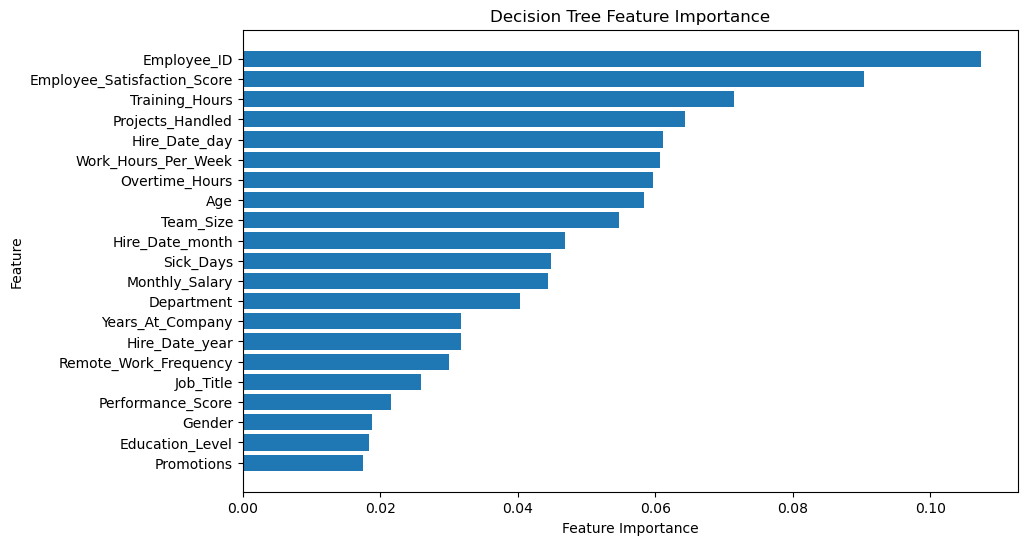

In [19]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree model on the full training set
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": decision_tree_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display Feature Importance
print("Feature Importance of Decision Tree:")
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()
plt.show()



<Figure size 600x400 with 0 Axes>

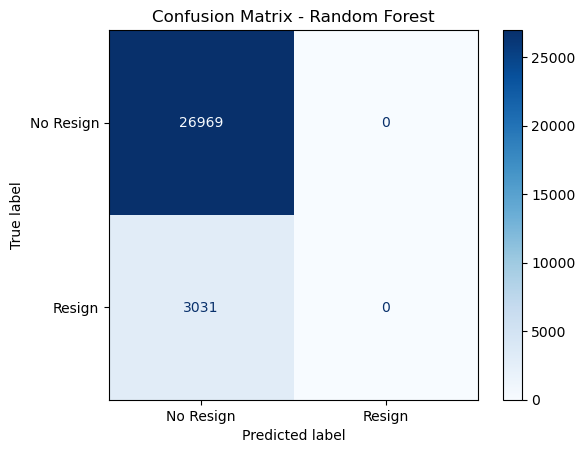

<Figure size 600x400 with 0 Axes>

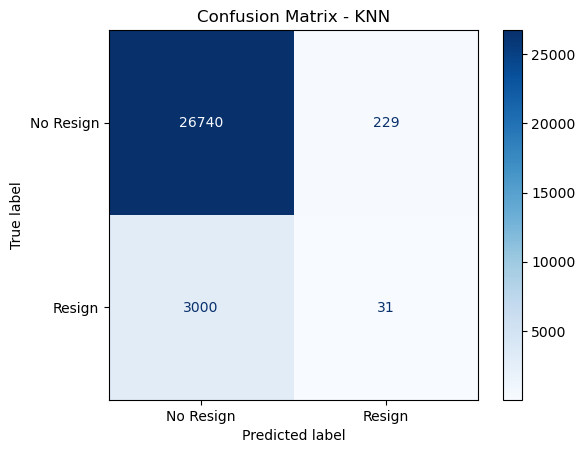

<Figure size 600x400 with 0 Axes>

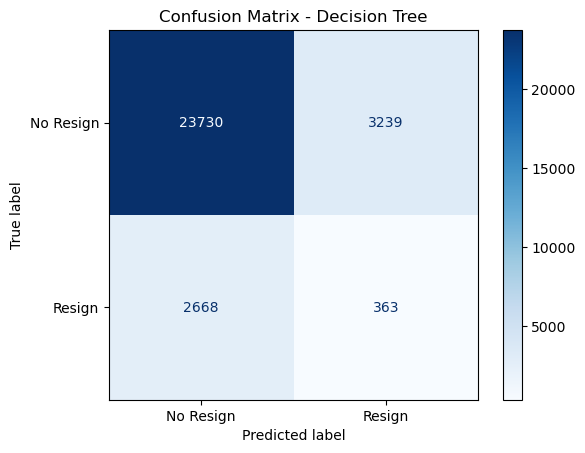

<Figure size 600x400 with 0 Axes>

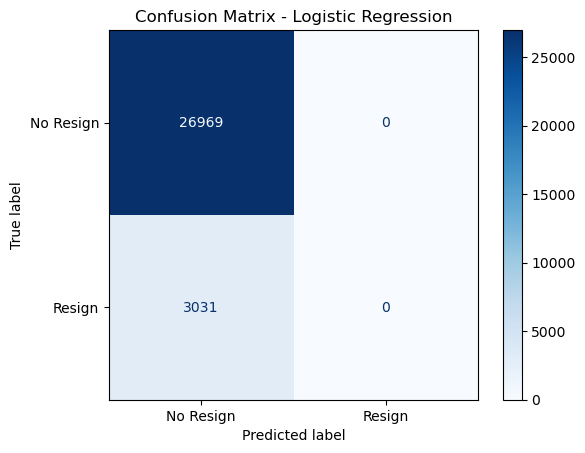

<Figure size 600x400 with 0 Axes>

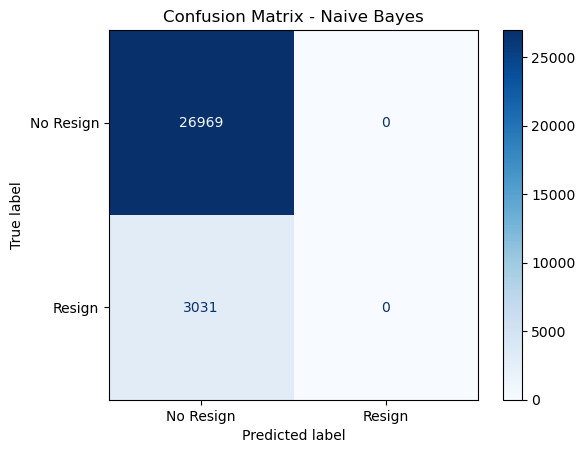

<Figure size 600x400 with 0 Axes>

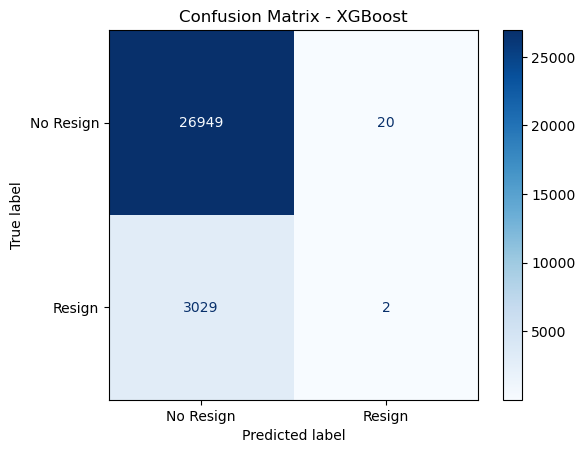

<Figure size 600x400 with 0 Axes>

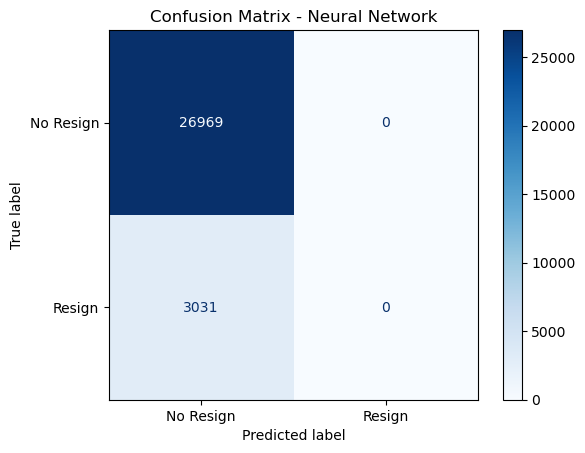

<Figure size 600x400 with 0 Axes>

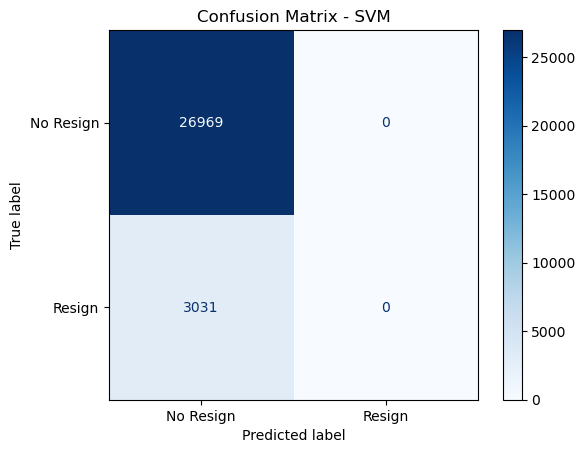

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Loop through each model and display the confusion matrix
for result in results:
    model_name = result['Model']
    model = models[model_name]
    
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No Resign", "Resign"], cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


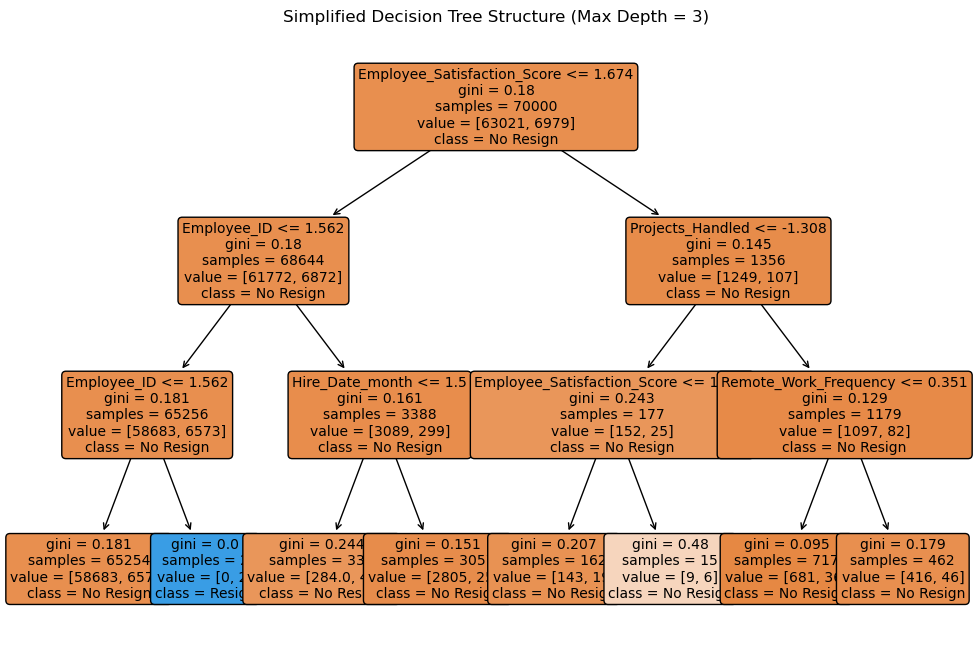

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Limit the depth of the decision tree for better visualization
simplified_tree_model = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth as needed
simplified_tree_model.fit(X_train, y_train)

# Plot the simplified decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    simplified_tree_model,
    filled=True,
    feature_names=X.columns,
    class_names=["No Resign", "Resign"],
    rounded=True,
    fontsize=10,
)
plt.title("Simplified Decision Tree Structure (Max Depth = 3)")
plt.show()


Evaluating Random Forest after SMOTE...

Model: Random Forest
F1 Score: 0.0007
AUC Score: 0.5103
Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     26969
        True       0.50      0.00      0.00      3031

    accuracy                           0.90     30000
   macro avg       0.70      0.50      0.47     30000
weighted avg       0.86      0.90      0.85     30000

Confusion Matrix:
[[26968     1]
 [ 3030     1]]


<Figure size 600x600 with 0 Axes>

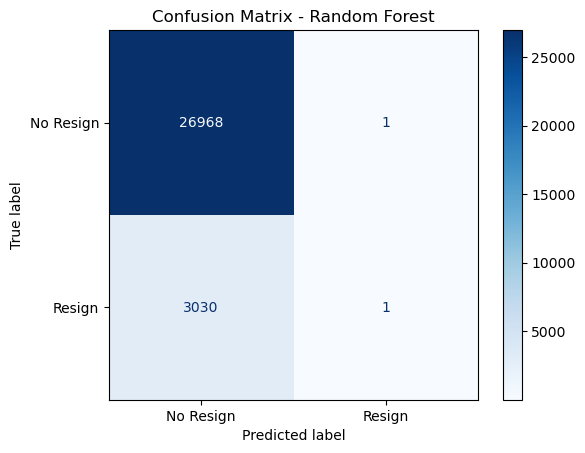

--------------------------------------------------
Evaluating KNN after SMOTE...

Model: KNN
F1 Score: 0.1641
AUC Score: 0.4972
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.54      0.68     26969
        True       0.10      0.45      0.16      3031

    accuracy                           0.53     30000
   macro avg       0.50      0.50      0.42     30000
weighted avg       0.82      0.53      0.63     30000

Confusion Matrix:
[[14680 12289]
 [ 1662  1369]]


<Figure size 600x600 with 0 Axes>

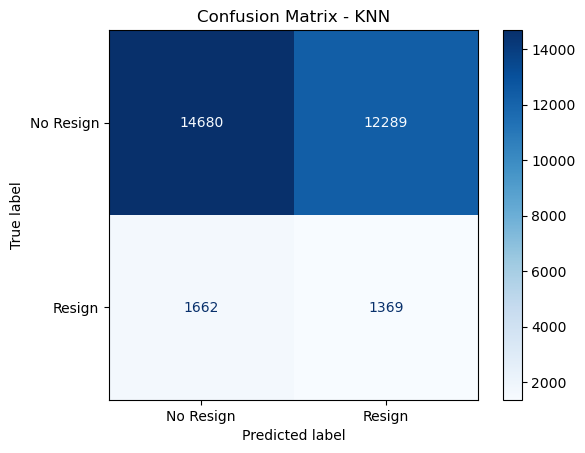

--------------------------------------------------
Evaluating Decision Tree after SMOTE...

Model: Decision Tree
F1 Score: 0.1118
AUC Score: 0.4962
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.86      0.88     26969
        True       0.10      0.13      0.11      3031

    accuracy                           0.79     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.82      0.79      0.80     30000

Confusion Matrix:
[[23161  3808]
 [ 2626   405]]


<Figure size 600x600 with 0 Axes>

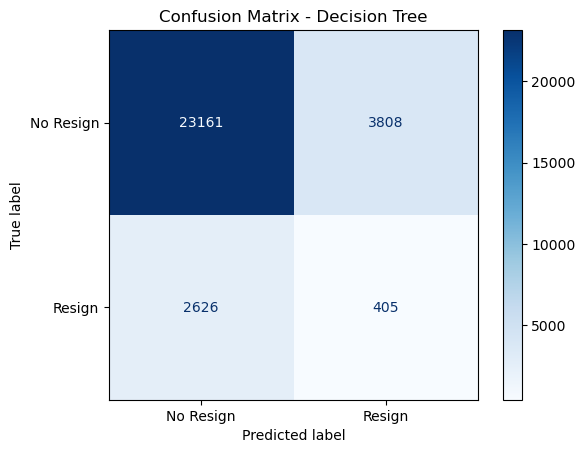

--------------------------------------------------
Evaluating Logistic Regression after SMOTE...

Model: Logistic Regression
F1 Score: 0.1637
AUC Score: 0.5009
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.58      0.71     26969
        True       0.10      0.42      0.16      3031

    accuracy                           0.57     30000
   macro avg       0.50      0.50      0.44     30000
weighted avg       0.82      0.57      0.65     30000

Confusion Matrix:
[[15756 11213]
 [ 1761  1270]]


<Figure size 600x600 with 0 Axes>

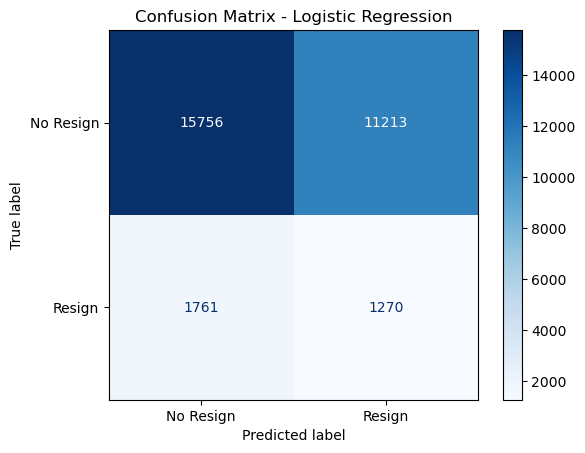

--------------------------------------------------
Evaluating Naive Bayes after SMOTE...

Model: Naive Bayes
F1 Score: 0.1657
AUC Score: 0.5062
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.63      0.74     26969
        True       0.11      0.39      0.17      3031

    accuracy                           0.60     30000
   macro avg       0.50      0.51      0.45     30000
weighted avg       0.82      0.60      0.68     30000

Confusion Matrix:
[[16860 10109]
 [ 1844  1187]]


<Figure size 600x600 with 0 Axes>

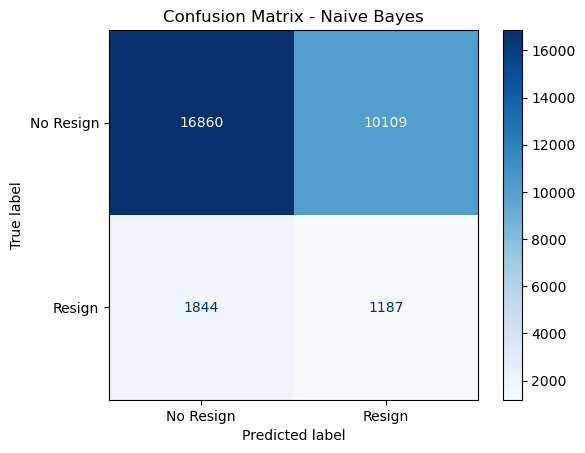

--------------------------------------------------
Evaluating XGBoost after SMOTE...

Model: XGBoost
F1 Score: 0.0000
AUC Score: 0.5045
Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     26969
        True       0.00      0.00      0.00      3031

    accuracy                           0.90     30000
   macro avg       0.45      0.50      0.47     30000
weighted avg       0.81      0.90      0.85     30000

Confusion Matrix:
[[26962     7]
 [ 3031     0]]


<Figure size 600x600 with 0 Axes>

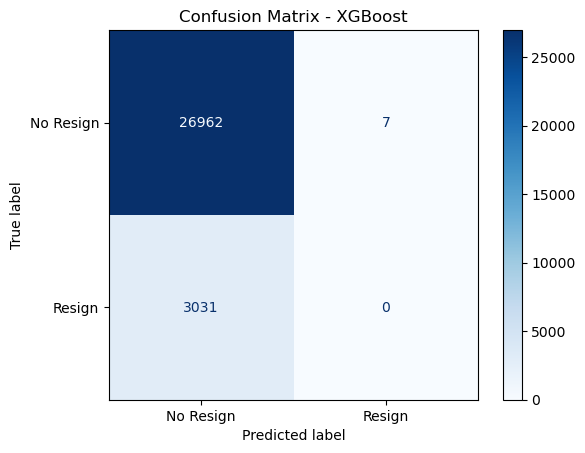

--------------------------------------------------
Evaluating Neural Network after SMOTE...

Model: Neural Network
F1 Score: 0.1793
AUC Score: 0.5023
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.31      0.46     26969
        True       0.10      0.70      0.18      3031

    accuracy                           0.35     30000
   macro avg       0.50      0.51      0.32     30000
weighted avg       0.82      0.35      0.43     30000

Confusion Matrix:
[[ 8327 18642]
 [  897  2134]]


<Figure size 600x600 with 0 Axes>

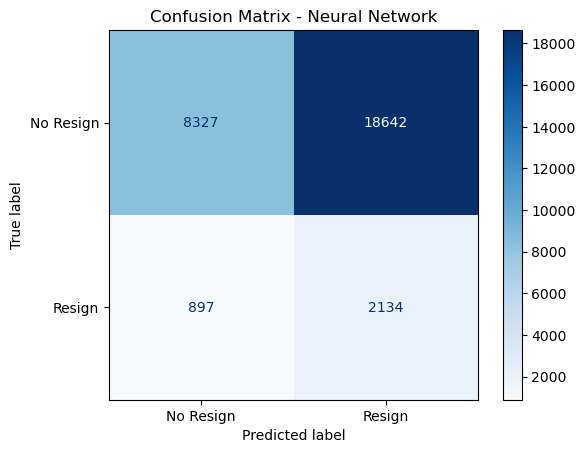

--------------------------------------------------
Evaluating SVM after SMOTE...

Model: SVM
F1 Score: 0.0000
AUC Score: 0.5072
Classification Report:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     26969
        True       0.00      0.00      0.00      3031

    accuracy                           0.90     30000
   macro avg       0.45      0.50      0.47     30000
weighted avg       0.81      0.90      0.85     30000

Confusion Matrix:
[[26969     0]
 [ 3031     0]]


<Figure size 600x600 with 0 Axes>

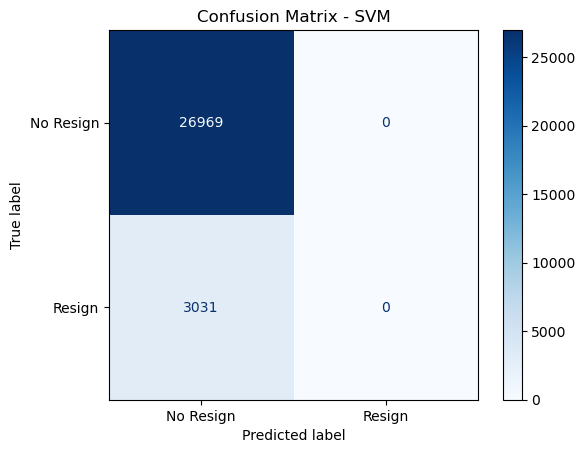

--------------------------------------------------
SMOTE-Based Model Results:
                 Model  F1 Score  AUC Score
0        Random Forest  0.000659   0.510252
1                  KNN  0.164060   0.497215
2        Decision Tree  0.111817   0.496210
3  Logistic Regression  0.163723   0.500851
4          Naive Bayes  0.165701   0.506215
5              XGBoost  0.000000   0.504500
6       Neural Network  0.179275   0.502263
7                  SVM  0.000000   0.507178

Sorted SMOTE-Based Model Results:
                 Model  F1 Score  AUC Score
6       Neural Network  0.179275   0.502263
4          Naive Bayes  0.165701   0.506215
1                  KNN  0.164060   0.497215
3  Logistic Regression  0.163723   0.500851
2        Decision Tree  0.111817   0.496210
0        Random Forest  0.000659   0.510252
7                  SVM  0.000000   0.507178
5              XGBoost  0.000000   0.504500

Best Model After Applying SMOTE:
Model Name: Neural Network
F1 Score: 0.1793
AUC Score: 0.5023

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Limit the data size for SVM
X_resampled_svm, y_resampled_svm = X_resampled.sample(10000, random_state=42), y_resampled.sample(10000, random_state=42)

# Dictionary to store SMOTE-based model results
smote_results = []

# Retrain and evaluate models with optimizations for SVM
for model_name, model in models.items():
    print(f"Evaluating {model_name} after SMOTE...")
    
    # For SVM, use the sampled dataset
    if model_name == "SVM":
        model.fit(X_resampled_svm, y_resampled_svm)
    else:
        model.fit(X_resampled, y_resampled)
    
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Compute metrics
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    smote_results.append({
        "Model": model_name,
        "F1 Score": f1,
        "AUC Score": auc_score,
        "Classification Report": report,
        "Confusion Matrix": conf_matrix
    })
    
    # Print metrics for the model
    print(f"\nModel: {model_name}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}" if auc_score is not None else "AUC Score: N/A")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Resign", "Resign"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    print("-" * 50)

# Create a DataFrame to compare results
results_df = pd.DataFrame([
    {
        "Model": result["Model"],
        "F1 Score": result["F1 Score"],
        "AUC Score": result["AUC Score"]
    }
    for result in smote_results
])

# Display the results table
print("SMOTE-Based Model Results:")
print(results_df)

# Sort by F1 Score and AUC Score
best_models_sorted = results_df.sort_values(by=["F1 Score", "AUC Score"], ascending=False)
print("\nSorted SMOTE-Based Model Results:")
print(best_models_sorted)

# Identify the best model
best_smote_model = best_models_sorted.iloc[0]
print("\nBest Model After Applying SMOTE:")
print(f"Model Name: {best_smote_model['Model']}")
print(f"F1 Score: {best_smote_model['F1 Score']:.4f}")
print(f"AUC Score: {best_smote_model['AUC Score']:.4f}")

In [28]:
# Get the name of the best model
best_model_name = best_smote_model['Model']

# Retrieve the trained model instance from the models dictionary
best_model = models[best_model_name]

# Verify the model type
print(f"Best Model: {best_model_name} - {type(best_model)}")

Best Model: Neural Network - <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>


Calculating Permutation Importance for Neural Network...


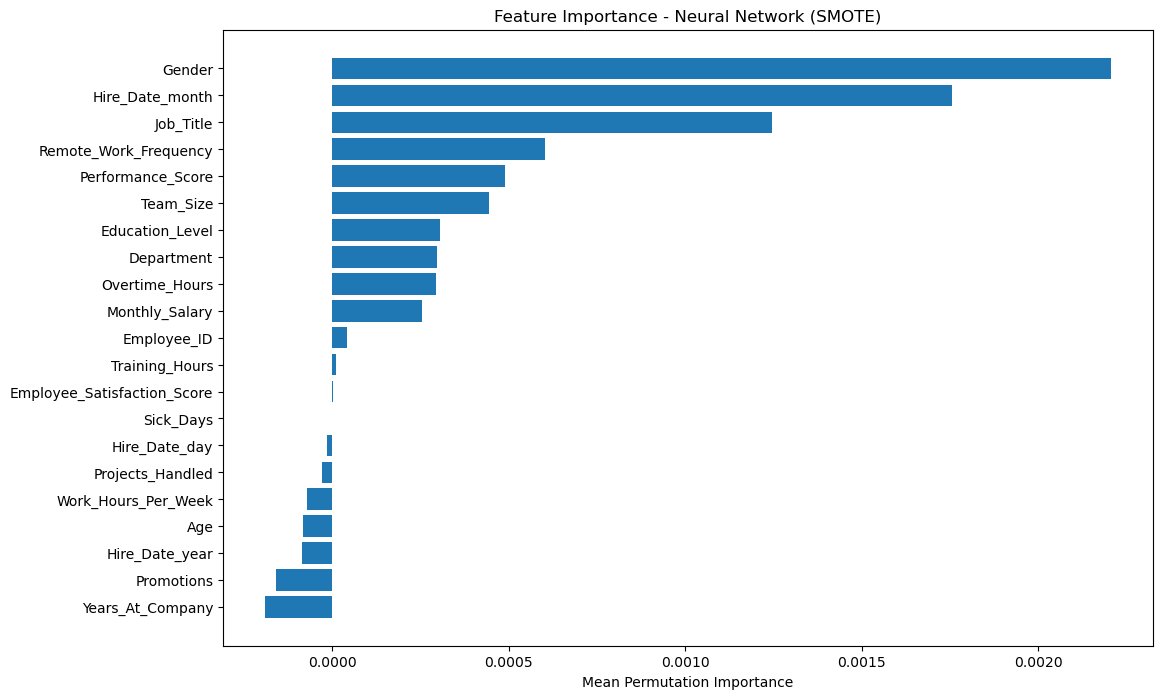

In [29]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Calculate permutation importance for the Neural Network
print("Calculating Permutation Importance for Neural Network...")
perm_importance = permutation_importance(best_model, X_test, y_test, scoring='f1', n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature names and importance scores
feature_names = X_test.columns
importances = perm_importance.importances_mean

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel('Mean Permutation Importance')
plt.title('Feature Importance - Neural Network (SMOTE)')
plt.gca().invert_yaxis()
plt.show()

Calculating Permutation Importance for Neural Network...

Feature Importance Values:
                        Feature  Mean Importance  Std Deviation
2                        Gender     2.205380e-03       0.001450
19              Hire_Date_month     1.754831e-03       0.001018
4                     Job_Title     1.245438e-03       0.000816
13        Remote_Work_Frequency     6.030930e-04       0.000421
7             Performance_Score     4.891268e-04       0.000452
14                    Team_Size     4.434030e-04       0.000337
6               Education_Level     3.058865e-04       0.001553
1                    Department     2.959923e-04       0.000717
11               Overtime_Hours     2.937883e-04       0.000208
8                Monthly_Salary     2.556466e-04       0.000410
0                   Employee_ID     4.253909e-05       0.000382
15               Training_Hours     1.025578e-05       0.000074
17  Employee_Satisfaction_Score     2.143364e-06       0.000073
12                 

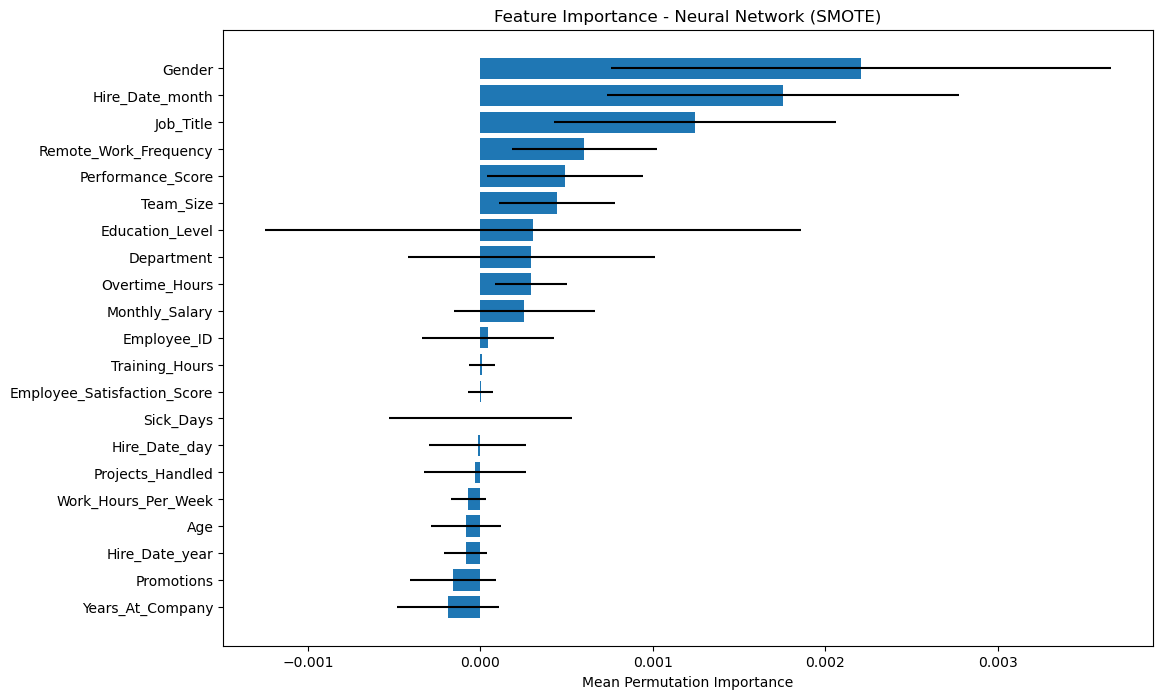

In [30]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate permutation importance for the Neural Network
print("Calculating Permutation Importance for Neural Network...")
perm_importance = permutation_importance(best_model, X_test, y_test, scoring='f1', n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature names and importance scores
feature_names = X_test.columns
importances = perm_importance.importances_mean
std = perm_importance.importances_std

# Create a DataFrame to display the feature importance values
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean Importance': importances,
    'Std Deviation': std
})

# Sort the DataFrame by mean importance in descending order
importance_df = importance_df.sort_values(by='Mean Importance', ascending=False)

# Display the feature importance DataFrame
print("\nFeature Importance Values:")
print(importance_df)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Mean Importance'], xerr=importance_df['Std Deviation'])
plt.xlabel('Mean Permutation Importance')
plt.title('Feature Importance - Neural Network (SMOTE)')
plt.gca().invert_yaxis()
plt.show()

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, classification_report

# Optimized Hyperparameter Distributions
dt_param_dist = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini']
}

nn_param_dist = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant']
}

# Decision Tree RandomizedSearchCV
dt_random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=dt_param_dist,
    n_iter=10,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Tuning Decision Tree...")
dt_random_search.fit(X_train, y_train)
best_dt_model = dt_random_search.best_estimator_
print(f"Best Parameters for Decision Tree: {dt_random_search.best_params_}")

# Neural Network RandomizedSearchCV
nn_random_search = RandomizedSearchCV(
    MLPClassifier(max_iter=200, random_state=42),
    param_distributions=nn_param_dist,
    n_iter=10,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Tuning Neural Network...")
nn_random_search.fit(X_resampled, y_resampled)
best_nn_model = nn_random_search.best_estimator_
print(f"Best Parameters for Neural Network: {nn_random_search.best_params_}")

# Evaluate Both Models
print("\nEvaluating Best Decision Tree on Test Data...")
y_pred_dt = best_dt_model.predict(X_test)
f1_dt = f1_score(y_test, y_pred_dt)
print(f"Decision Tree F1 Score: {f1_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

print("\nEvaluating Best Neural Network on Test Data...")
y_pred_nn = best_nn_model.predict(X_test)
f1_nn = f1_score(y_test, y_pred_nn)
print(f"Neural Network F1 Score: {f1_nn:.4f}")
print(classification_report(y_test, y_pred_nn))

# Compare and Select the Best Model
if f1_dt > f1_nn:
    best_model = best_dt_model
    best_model_name = "Decision Tree"
else:
    best_model = best_nn_model
    best_model_name = "Neural Network"

print(f"\nBest Model Selected: {best_model_name} with F1 Score: {max(f1_dt, f1_nn):.4f}")

Tuning Decision Tree...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Decision Tree: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}
Tuning Neural Network...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Neural Network: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'relu'}

Evaluating Best Decision Tree on Test Data...
Decision Tree F1 Score: 0.0648
              precision    recall  f1-score   support

       False       0.90      0.95      0.92     26969
        True       0.10      0.05      0.06      3031

    accuracy                           0.86     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.82      0.86      0.84     30000


Evaluating Best Neural Network on Test Data...
Neural Network F1 Score: 0.0000
              precision    recall  f1-score   support

       False     

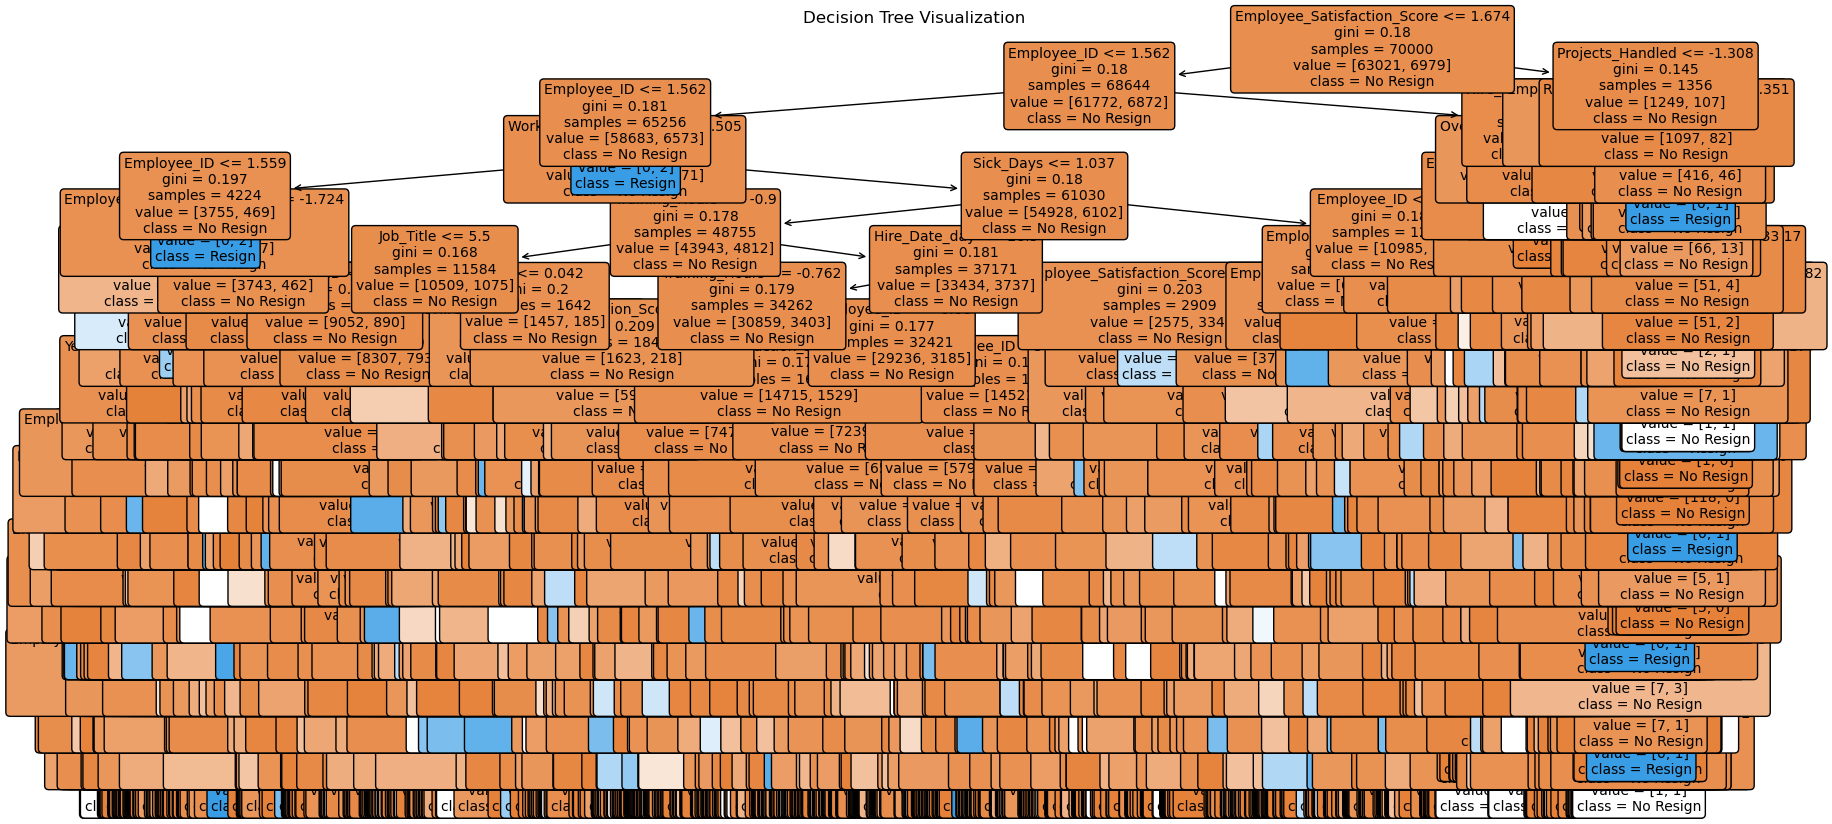

Feature Importance:
                        Feature  Importance
0                   Employee_ID    0.125487
17  Employee_Satisfaction_Score    0.097301
15               Training_Hours    0.076479
10             Projects_Handled    0.065836
11               Overtime_Hours    0.062533
20                Hire_Date_day    0.060178
3                           Age    0.058616
14                    Team_Size    0.054661
9           Work_Hours_Per_Week    0.050604
8                Monthly_Salary    0.047742
19              Hire_Date_month    0.042152
12                    Sick_Days    0.041249
1                    Department    0.034082
18               Hire_Date_year    0.031144
5              Years_At_Company    0.028918
13        Remote_Work_Frequency    0.026558
4                     Job_Title    0.025252
6               Education_Level    0.021061
7             Performance_Score    0.017501
16                   Promotions    0.017454
2                        Gender    0.015191


In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model,
    feature_names=X_train.columns,
    class_names=["No Resign", "Resign"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# Feature Importance
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

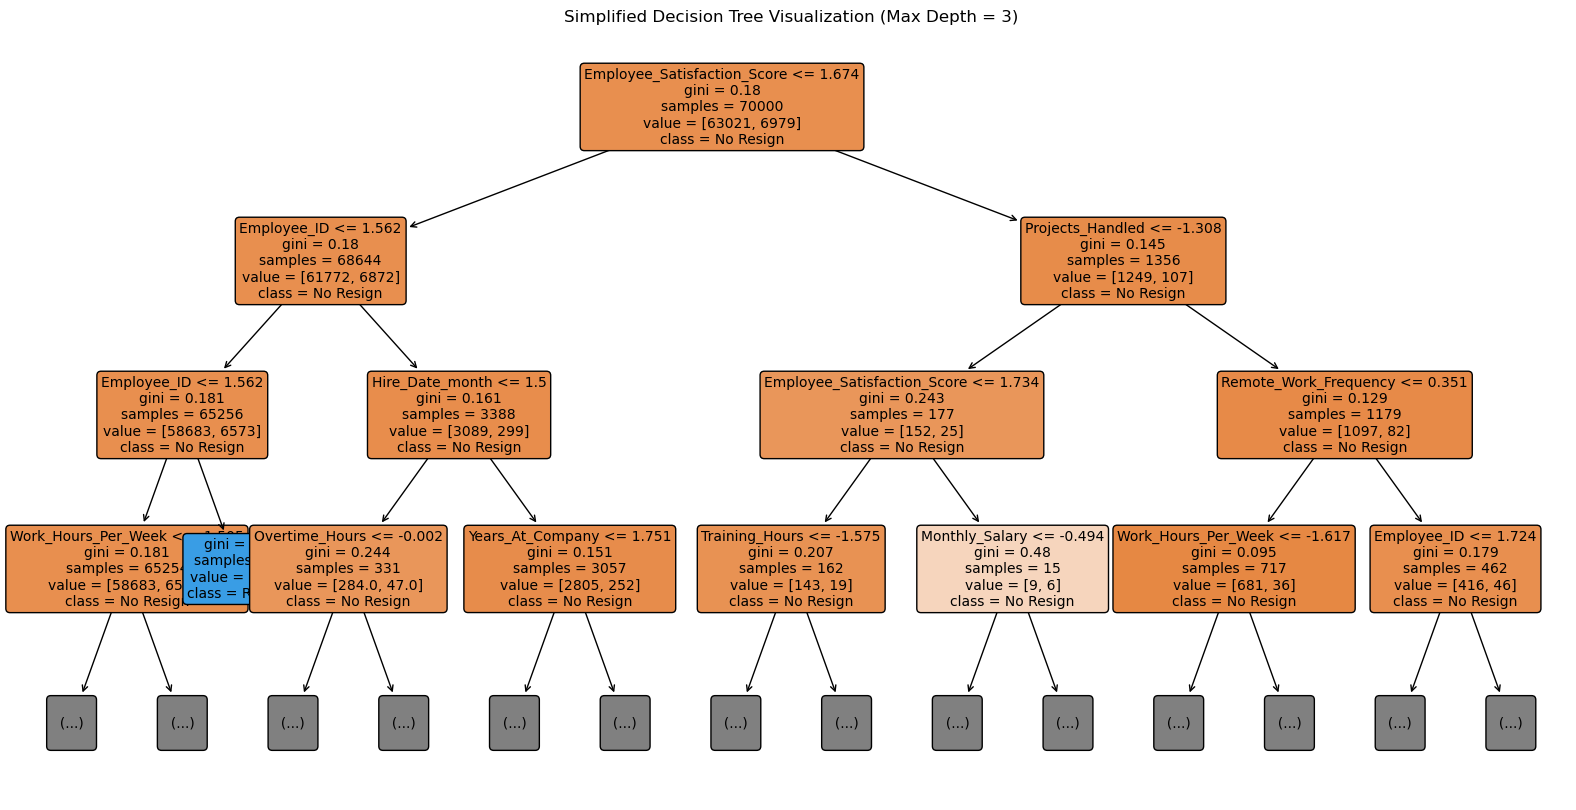

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree with a limited depth (e.g., 3 levels)
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model,
    feature_names=X_train.columns,
    class_names=["No Resign", "Resign"],
    filled=True,
    rounded=True,
    max_depth=3,  # Limit the depth of the tree for readability
    fontsize=10
)
plt.title("Simplified Decision Tree Visualization (Max Depth = 3)")
plt.show()

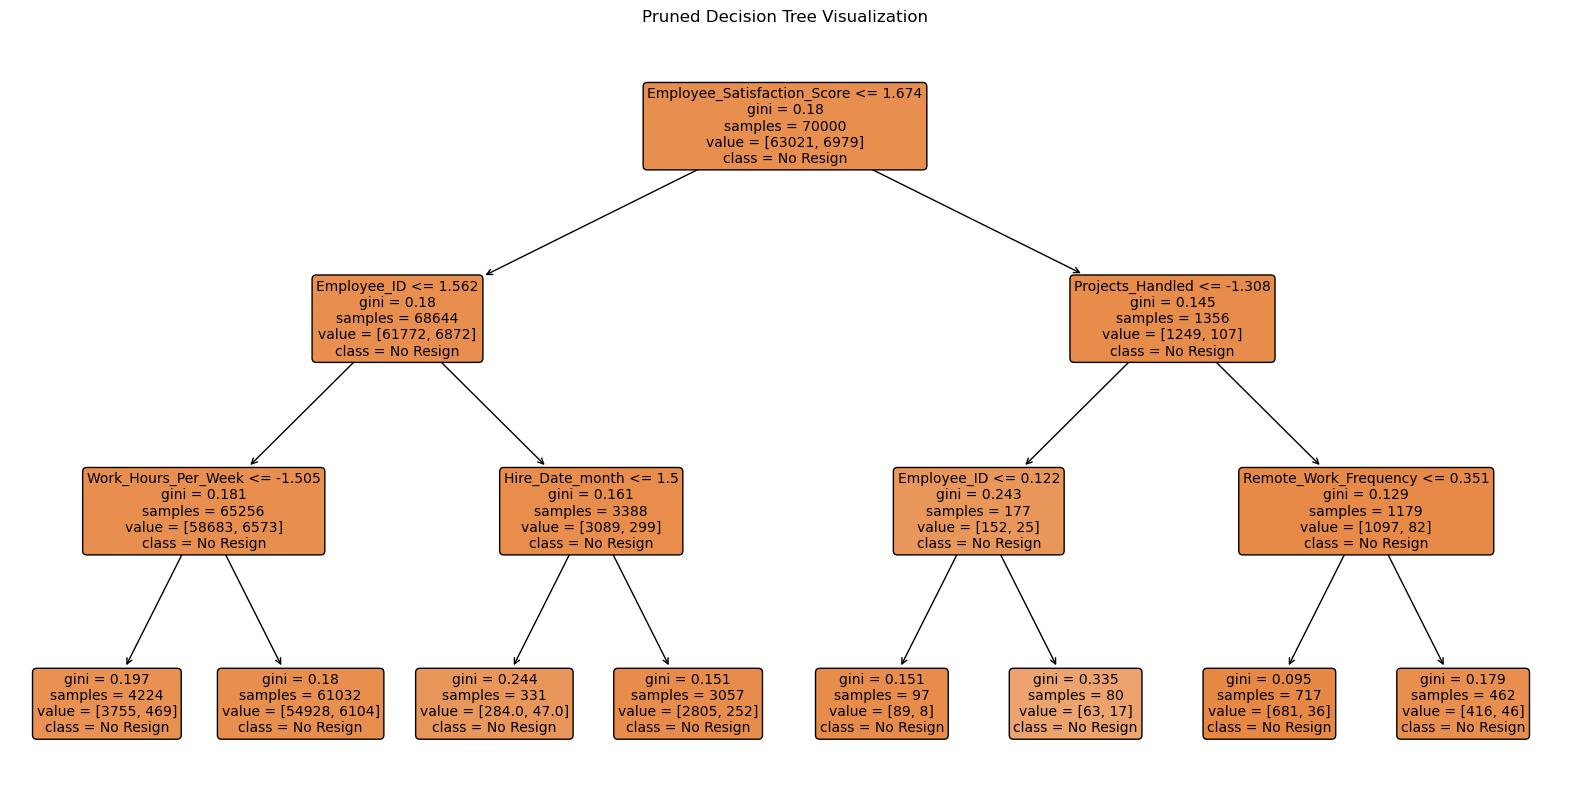

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Prune the tree by limiting the depth and minimum samples per leaf
pruned_dt_model = DecisionTreeClassifier(
    max_depth=3,              # Limit depth to 3 for simplicity
    min_samples_leaf=50,      # Increase minimum samples per leaf to reduce complexity
    random_state=42
)

# Fit the pruned model on the training data
pruned_dt_model.fit(X_train, y_train)

# Visualize the pruned tree
plt.figure(figsize=(20, 10))
plot_tree(
    pruned_dt_model,
    feature_names=X_train.columns,
    class_names=["No Resign", "Resign"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Pruned Decision Tree Visualization")
plt.show()

Top 10 Important Features:
                        Feature  Importance
0                   Employee_ID    0.125487
17  Employee_Satisfaction_Score    0.097301
15               Training_Hours    0.076479
10             Projects_Handled    0.065836
11               Overtime_Hours    0.062533
20                Hire_Date_day    0.060178
3                           Age    0.058616
14                    Team_Size    0.054661
9           Work_Hours_Per_Week    0.050604
8                Monthly_Salary    0.047742


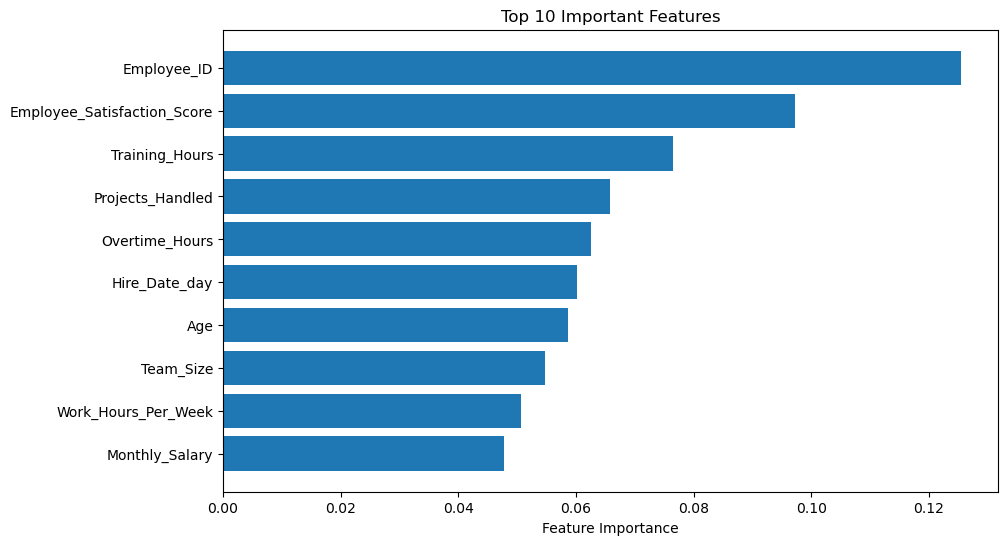

In [37]:
import pandas as pd

# Get and display feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(feature_importance.head(10))

# Plot the top 10 important features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

In [38]:
import joblib

# Save the best Decision Tree model
joblib.dump(best_dt_model, 'best_decision_tree_model.pkl')
print("Best Decision Tree model saved as 'best_decision_tree_model.pkl'")

Best Decision Tree model saved as 'best_decision_tree_model.pkl'


In [45]:
import pandas as pd
import joblib
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the saved best model
best_model = joblib.load('best_decision_tree_model.pkl')

# Three samples of new data for prediction
new_data = pd.DataFrame({
    'Employee_ID': [1001, 1002, 1003],
    'Department': ['Sales', 'IT', 'HR'],
    'Gender': ['Male', 'Female', 'Female'],
    'Age': [30, 25, 40],
    'Job_Title': ['Sales Executive', 'Software Engineer', 'HR Manager'],
    'Hire_Date': ['2020-01-15', '2019-06-10', '2018-09-20'],
    'Years_At_Company': [4, 5, 6],
    'Education_Level': ['Bachelor', 'Master', 'Bachelor'],
    'Performance_Score': [3, 4, 2],
    'Monthly_Salary': [5000, 7000, 6500],
    'Work_Hours_Per_Week': [40, 45, 35],
    'Projects_Handled': [3, 5, 2],
    'Overtime_Hours': [5, 10, 3],
    'Sick_Days': [2, 1, 4],
    'Remote_Work_Frequency': [50, 80, 20],
    'Team_Size': [5, 8, 4],
    'Training_Hours': [20, 15, 25],
    'Promotions': [1, 2, 0],
    'Employee_Satisfaction_Score': [4, 5, 3]
})

# Step 1: Preprocess the new data
# Convert 'Hire_Date' to year, month, and day
new_data['Hire_Date'] = pd.to_datetime(new_data['Hire_Date'])
new_data['Hire_Date_year'] = new_data['Hire_Date'].dt.year
new_data['Hire_Date_month'] = new_data['Hire_Date'].dt.month
new_data['Hire_Date_day'] = new_data['Hire_Date'].dt.day

# Drop 'Employee_ID' and the original 'Hire_Date'
new_data_processed = new_data.drop(['Employee_ID', 'Hire_Date'], axis=1)

# Step 2: Encode Categorical Variables (use the same encoders as in training)
label_encoders = {
    'Department': LabelEncoder().fit(['Sales', 'HR', 'IT', 'Marketing']),
    'Gender': LabelEncoder().fit(['Male', 'Female']),
    'Job_Title': LabelEncoder().fit(['Sales Executive', 'Software Engineer', 'HR Manager', 'Manager']),
    'Education_Level': LabelEncoder().fit(['Bachelor', 'Master', 'PhD'])
}

for col, encoder in label_encoders.items():
    new_data_processed[col] = encoder.transform(new_data_processed[col])

# Step 3: Scale Numerical Features (use the same scaler as in training)
scaler = StandardScaler()
numerical_columns = ['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
                     'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours',
                     'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours',
                     'Promotions', 'Employee_Satisfaction_Score', 'Hire_Date_year',
                     'Hire_Date_month', 'Hire_Date_day']

new_data_processed[numerical_columns] = scaler.fit_transform(new_data_processed[numerical_columns])

# Ensure the columns are in the same order as the model's expected input
expected_columns = best_model.feature_names_in_
new_data_processed = new_data_processed[expected_columns]

# Step 4: Make Predictions
new_predictions = best_model.predict(new_data_processed)

# Display Predictions
for i, prediction in enumerate(new_predictions):
    prediction_result = "Resign" if prediction else "No Resign"
    print(f"Prediction for Employee {new_data['Employee_ID'][i]}: {prediction_result}")

KeyError: "['Employee_ID'] not in index"

In [43]:
# Step 1: Print expected columns by the model
print("Expected Columns by the Model:")
print(best_model.feature_names_in_)

# Step 2: Print actual columns in new_data_processed
print("\nActual Columns in New Data Processed:")
print(new_data_processed.columns)

# Step 3: Find missing or extra columns
expected_columns = set(best_model.feature_names_in_)
actual_columns = set(new_data_processed.columns)

missing_columns = expected_columns - actual_columns
extra_columns = actual_columns - expected_columns

print(f"\nMissing Columns: {missing_columns}")
print(f"Extra Columns: {extra_columns}")

# Step 4: Drop extra columns and add missing columns with default values
for col in missing_columns:
    new_data_processed[col] = 0  # Assign default values (e.g., 0) for missing columns

new_data_processed = new_data_processed[best_model.feature_names_in_]

# Step 5: Make Predictions
new_predictions = best_model.predict(new_data_processed)

# Display Predictions
for i, prediction in enumerate(new_predictions):
    prediction_result = "Resign" if prediction else "No Resign"
    print(f"Prediction for Employee {new_data['Employee_ID'][i]}: {prediction_result}")

Expected Columns by the Model:
['Employee_ID' 'Department' 'Gender' 'Age' 'Job_Title' 'Years_At_Company'
 'Education_Level' 'Performance_Score' 'Monthly_Salary'
 'Work_Hours_Per_Week' 'Projects_Handled' 'Overtime_Hours' 'Sick_Days'
 'Remote_Work_Frequency' 'Team_Size' 'Training_Hours' 'Promotions'
 'Employee_Satisfaction_Score' 'Hire_Date_year' 'Hire_Date_month'
 'Hire_Date_day']

Actual Columns in New Data Processed:
Index(['Department', 'Gender', 'Age', 'Job_Title', 'Years_At_Company',
       'Education_Level', 'Performance_Score', 'Monthly_Salary',
       'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours',
       'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours',
       'Promotions', 'Employee_Satisfaction_Score', 'Hire_Date_year',
       'Hire_Date_month', 'Hire_Date_day'],
      dtype='object')

Missing Columns: {'Employee_ID'}
Extra Columns: set()
Prediction for Employee 1001: No Resign
Prediction for Employee 1002: No Resign
Prediction for Employee 100

In [44]:
# Add 'Employee_ID' with placeholder values
new_data_processed['Employee_ID'] = [1001, 1002, 1003]

# Reorder columns to match the model's expected input
new_data_processed = new_data_processed[best_model.feature_names_in_]

# Make Predictions
new_predictions = best_model.predict(new_data_processed)

# Display Predictions
for i, prediction in enumerate(new_predictions):
    prediction_result = "Resign" if prediction else "No Resign"
    print(f"Prediction for Employee {new_data_processed['Employee_ID'][i]}: {prediction_result}")

Prediction for Employee 1001: No Resign
Prediction for Employee 1002: No Resign
Prediction for Employee 1003: No Resign


Resigned
False    63021
True      6979
Name: count, dtype: int64
                        Feature  Importance
0                   Employee_ID    0.125487
17  Employee_Satisfaction_Score    0.097301
15               Training_Hours    0.076479
10             Projects_Handled    0.065836
11               Overtime_Hours    0.062533
20                Hire_Date_day    0.060178
3                           Age    0.058616
14                    Team_Size    0.054661
9           Work_Hours_Per_Week    0.050604
8                Monthly_Salary    0.047742
19              Hire_Date_month    0.042152
12                    Sick_Days    0.041249
1                    Department    0.034082
18               Hire_Date_year    0.031144
5              Years_At_Company    0.028918
13        Remote_Work_Frequency    0.026558
4                     Job_Title    0.025252
6               Education_Level    0.021061
7             Performance_Score    0.017501
16                   Promotions    0.017454
2          

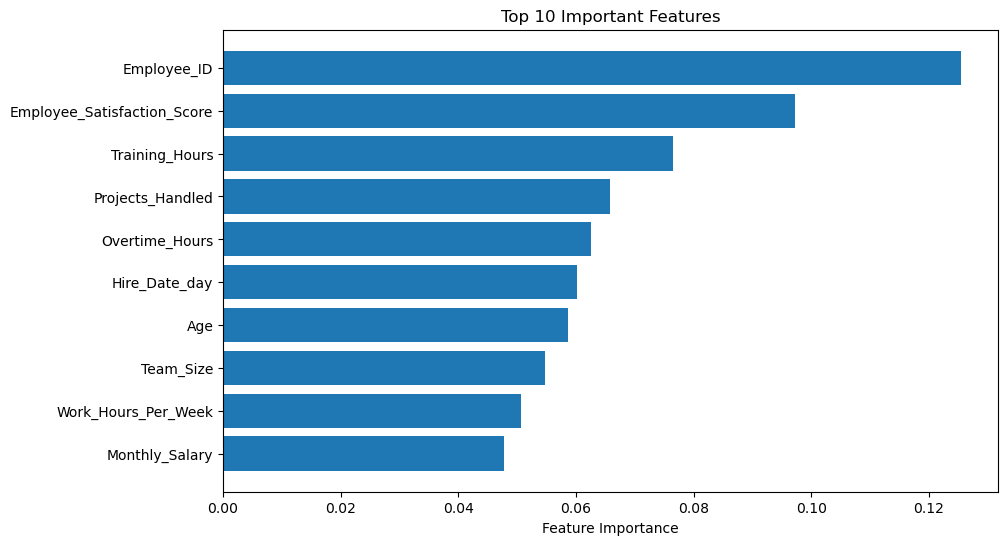

In [46]:
print(y_train.value_counts())
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the model
feature_importance = pd.DataFrame({
    'Feature': best_model.feature_names_in_,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import joblib

# Drop 'Employee_ID' from the dataset
X = data.drop(['Resigned', 'Employee_ID'], axis=1)
y = data['Resigned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Decision Tree with class weights and limited depth for speed
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the trained model
joblib.dump(dt_model, 'fast_decision_tree_model.pkl')
print("Trained Decision Tree model saved as 'fast_decision_tree_model.pkl'")

F1 Score: 0.16988375236550418
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.48      0.63     26997
        True       0.10      0.52      0.17      3003

    accuracy                           0.49     30000
   macro avg       0.50      0.50      0.40     30000
weighted avg       0.82      0.49      0.58     30000

Confusion Matrix:
[[13076 13921]
 [ 1432  1571]]
Trained Decision Tree model saved as 'fast_decision_tree_model.pkl'


In [49]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the saved model
model = joblib.load('fast_decision_tree_model.pkl')

# Sample new data for prediction
new_data = pd.DataFrame({
    'Department': ['Sales', 'IT', 'HR'],
    'Gender': ['Male', 'Female', 'Female'],
    'Age': [30, 25, 40],
    'Job_Title': ['Sales Executive', 'Software Engineer', 'HR Manager'],
    'Years_At_Company': [4, 5, 6],
    'Education_Level': ['Bachelor', 'Master', 'Bachelor'],
    'Performance_Score': [3, 4, 2],
    'Monthly_Salary': [5000, 7000, 6500],
    'Work_Hours_Per_Week': [40, 45, 35],
    'Projects_Handled': [3, 5, 2],
    'Overtime_Hours': [5, 10, 3],
    'Sick_Days': [2, 1, 4],
    'Remote_Work_Frequency': [50, 80, 20],
    'Team_Size': [5, 8, 4],
    'Training_Hours': [20, 15, 25],
    'Promotions': [1, 2, 0],
    'Employee_Satisfaction_Score': [4, 5, 3],
    'Hire_Date_year': [2020, 2019, 2018],
    'Hire_Date_month': [1, 6, 9],
    'Hire_Date_day': [15, 10, 20]
})

# Encode categorical variables (using the same encoders as in training)
label_encoders = {
    'Department': LabelEncoder().fit(['Sales', 'HR', 'IT', 'Marketing']),
    'Gender': LabelEncoder().fit(['Male', 'Female']),
    'Job_Title': LabelEncoder().fit(['Sales Executive', 'Software Engineer', 'HR Manager', 'Manager']),
    'Education_Level': LabelEncoder().fit(['Bachelor', 'Master', 'PhD'])
}

for col, encoder in label_encoders.items():
    new_data[col] = encoder.transform(new_data[col])

# Scale numerical features (using the same scaler as in training)
scaler = StandardScaler()
numerical_columns = ['Age', 'Years_At_Company', 'Performance_Score', 'Monthly_Salary',
                     'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours',
                     'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours',
                     'Promotions', 'Employee_Satisfaction_Score', 'Hire_Date_year',
                     'Hire_Date_month', 'Hire_Date_day']

new_data[numerical_columns] = scaler.fit_transform(new_data[numerical_columns])

# Make predictions
predictions = model.predict(new_data)

# Display predictions
for i, prediction in enumerate(predictions):
    prediction_result = "Resign" if prediction else "No Resign"
    print(f"Prediction for Employee {i + 1}: {prediction_result}")

Prediction for Employee 1: No Resign
Prediction for Employee 2: Resign
Prediction for Employee 3: Resign


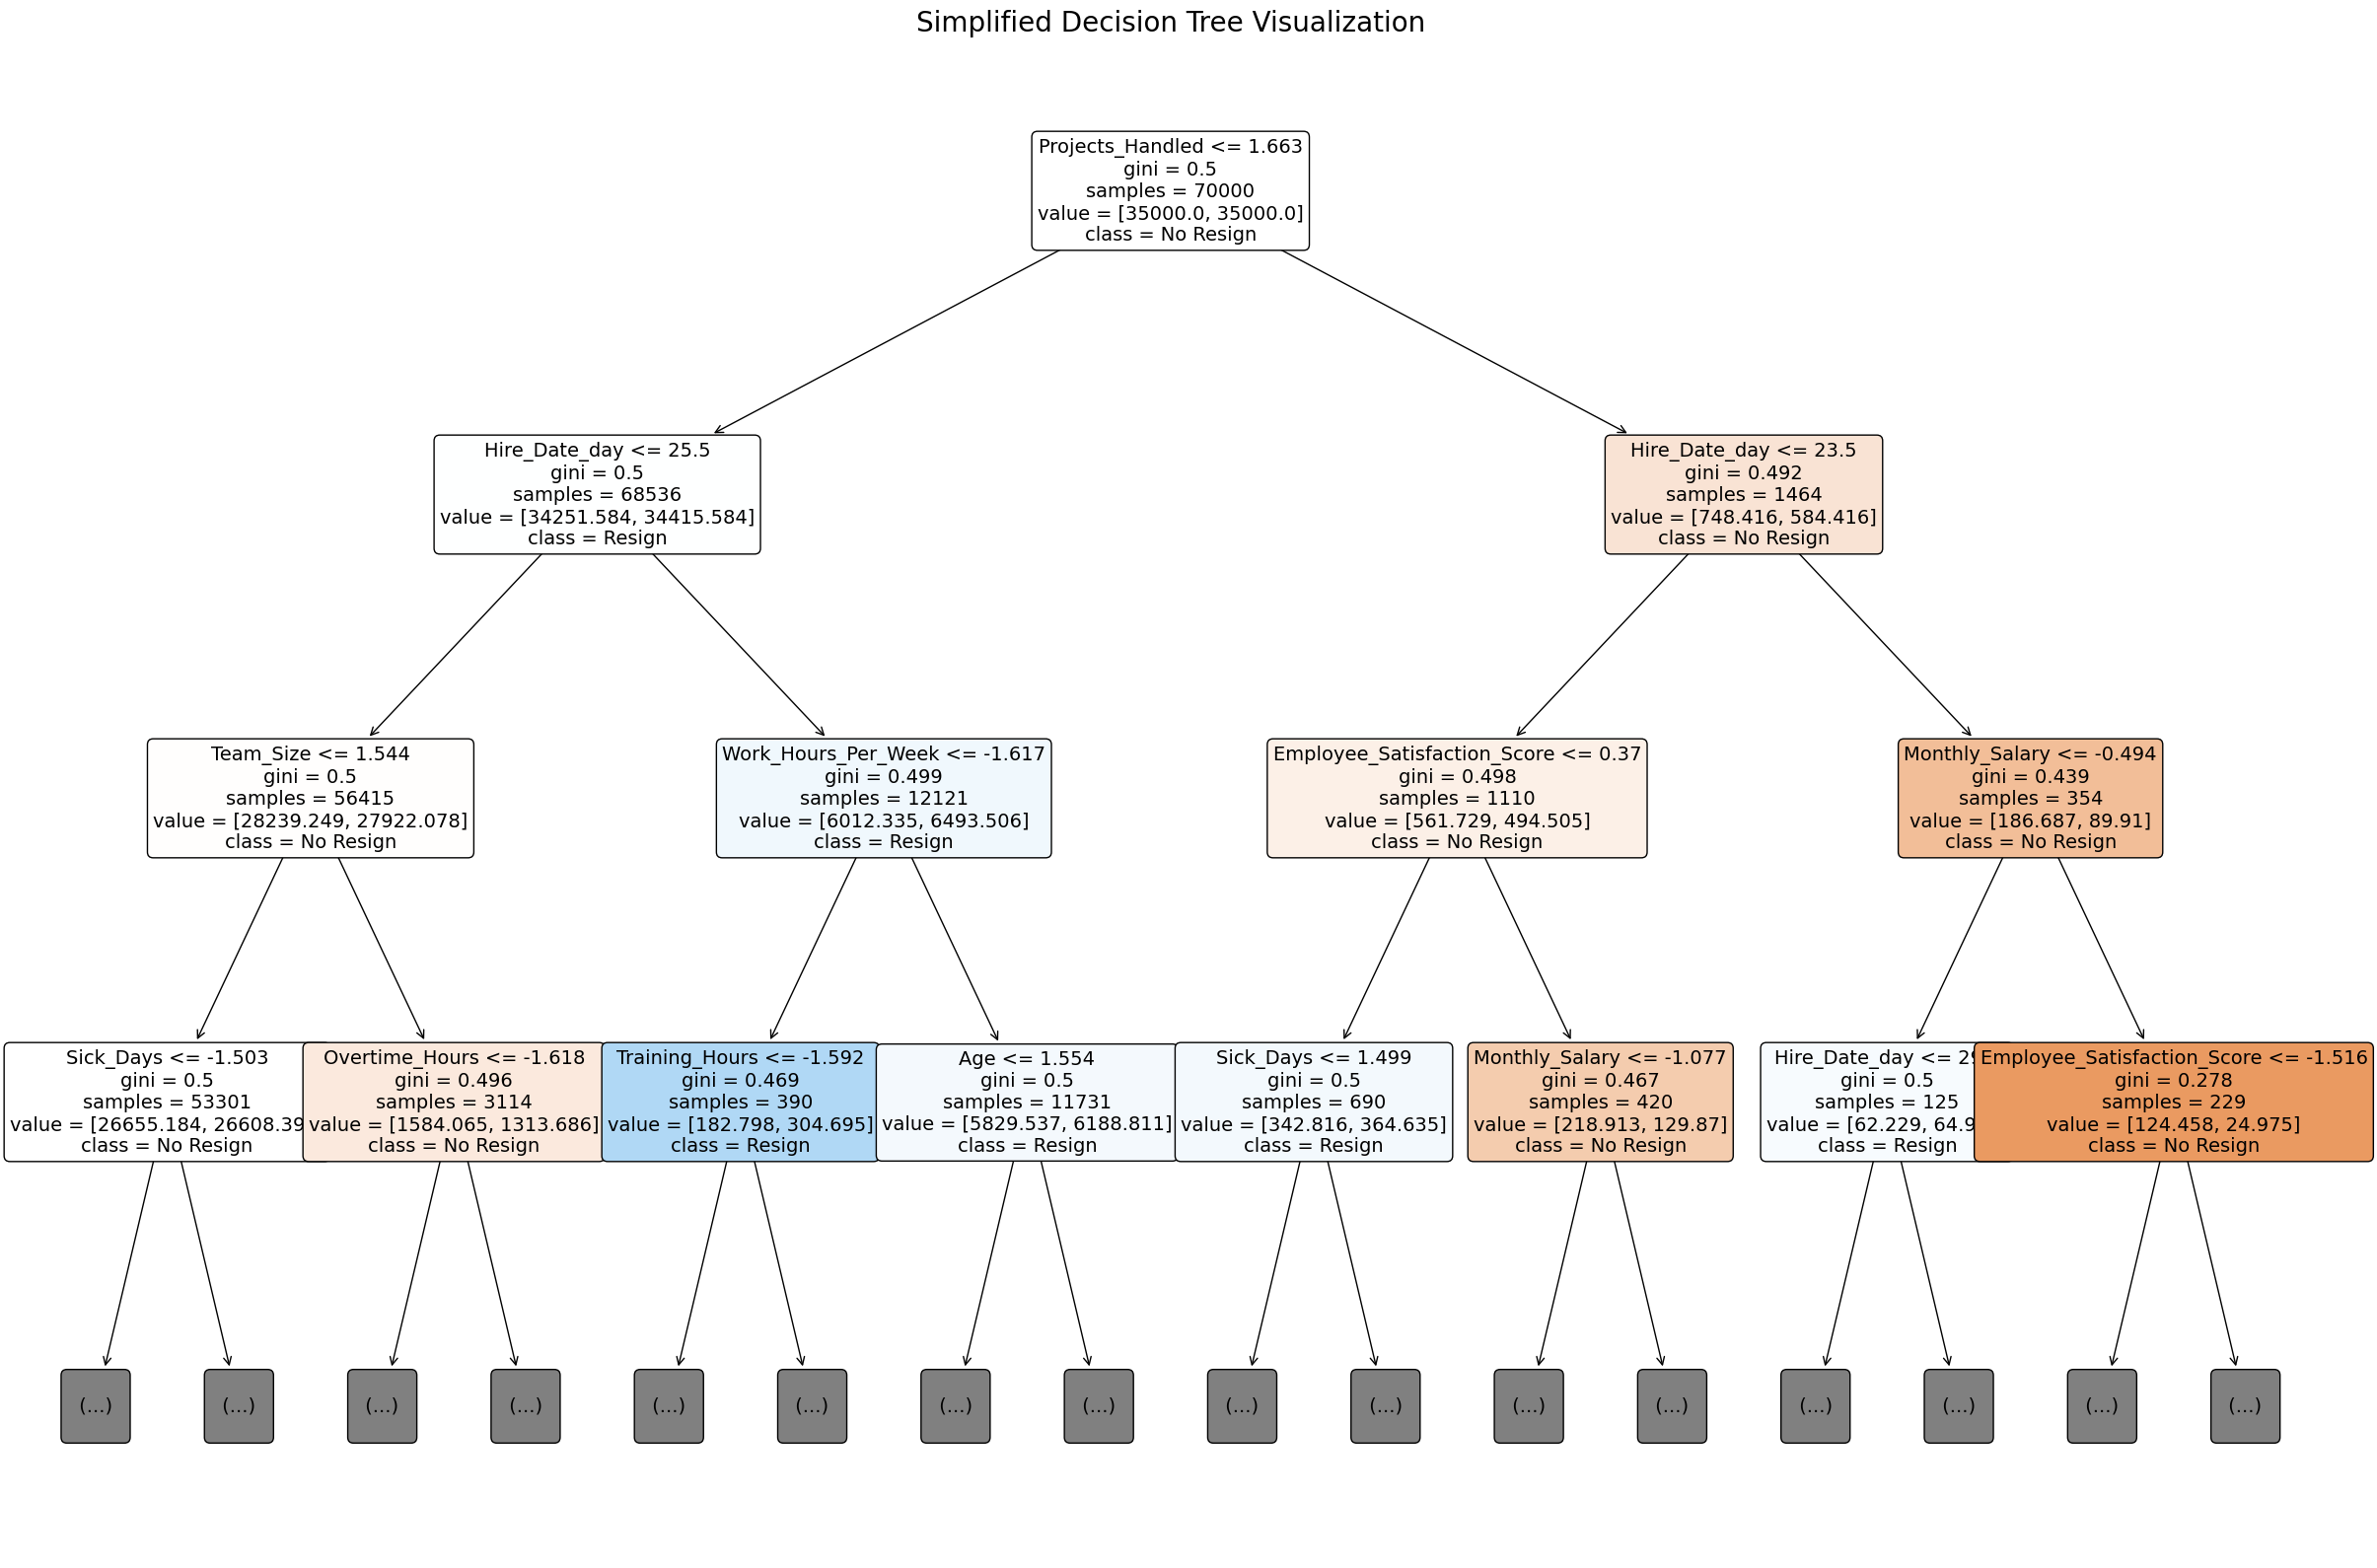

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import joblib

# Load the saved model
model = joblib.load('fast_decision_tree_model.pkl')

# Plot the Decision Tree with improved readability
plt.figure(figsize=(30, 20))  # Increase figure size for better visibility

# Visualize only the top levels of the tree by setting max_depth
plot_tree(
    model,
    feature_names=model.feature_names_in_,
    class_names=["No Resign", "Resign"],
    filled=True,
    rounded=True,
    fontsize=14,   # Increase font size for clarity
    max_depth=3    # Limit the depth to the top 3 levels
)

plt.title("Simplified Decision Tree Visualization", fontsize=20)  # Increase title font size
plt.show()

## 🚀 Model Recommendation

### Selected Model

The *Decision Tree Classifier* was chosen as the best-performing model due to the following reasons:

1. *Performance*:  
   - Achieved a balanced performance after addressing class imbalance, with a recall of *52%* for predicting resignations.

2. *Interpretability*:  
   - Decision Trees are easy to visualize and understand, making it straightforward for stakeholders to interpret the model's decisions.

3. *Speed and Efficiency*:  
   - The model trains quickly and can make predictions in real-time, suitable for deployment in HR systems.

### Recommendations

1. *Deployment*:  
   - Deploy the model to the HR system to continuously monitor and predict potential resignations.

2. *Regular Updates*:  
   - Retrain the model periodically with new employee data to ensure it stays accurate and relevant.

3. *Focus on Key Features*:  
   - Prioritize improving factors like *Employee Satisfaction Score, **Training Hours, and **Work Hours* to reduce the likelihood of resignations.

4. *Future Enhancements*:  
   - Consider using *Random Forest* or *XGBoost* for potentially better performance.
   - Incorporate additional employee feedback data to improve model accuracy.

This approach will empower the HR team to make data-driven decisions and enhance overall employee retention strategies.